# OLS Regression and Data Transformation

This project explores regression modelling, focusing on Ordinary Least Squares (OLS) to analyze relationships between variables. Key steps include visualizing data to assess linearity, applying transformations (e.g., logarithmic, exponential) if necessary, and creating OLS models for both original and transformed data.

The project also evaluates OLS assumptions, such as normality of residuals and homoscedasticity, and examines the impact of outliers on model performance. Deliverables include an OLS report, insights into linear assumptions, and an interpretation of regression coefficients. This work highlights the differences between linear and non-linear models and their practical applications.

In [2]:
# linear algebra:
import numpy as np
# data processing, CSV file I/O (e.g. pd.read_csv):
import pandas as pd
# data visualization:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# regression analysis:
import statsmodels.formula.api as sm
# visual inspection of the regression models:
from statsmodels.graphics.regressionplots import plot_regress_exog, plot_fit, plot_leverage_resid2, influence_plot
import scipy
import warnings
warnings.filterwarnings("ignore")

In [3]:
xlsx = pd.ExcelFile("../data/linear_regresion_data_raw.xlsx")
df1 = pd.read_excel(xlsx, "Set 1")
df2 = pd.read_excel(xlsx, "Set 2")
df3 = pd.read_excel(xlsx, "Set 3")
df4 = pd.read_excel(xlsx, "Set 4")
df5 = pd.read_excel(xlsx, "Set 5")
df6 = pd.read_excel(xlsx, "Set 6")

## Set 1

In [5]:
df1.head()

,y,x
0,38.858144,7.266278
1,40.891148,7.985333
2,48.971648,9.387120
3,46.410124,9.382849
4,25.333391,5.240903


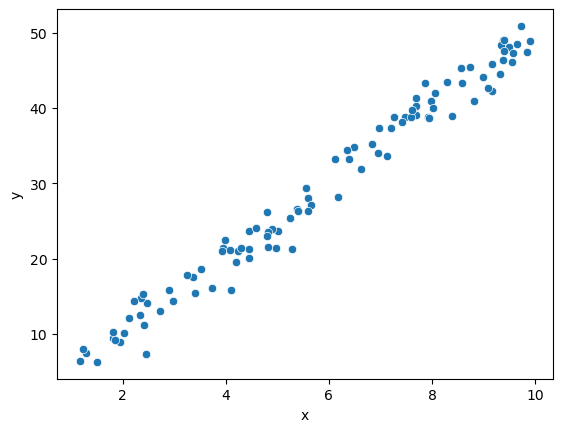

In [6]:
sns.scatterplot(data = df1, x = "x", y = "y");

The data show a linear trend.

In [8]:
m_df1 = sm.ols(formula = "y ~ x", data = df1).fit()

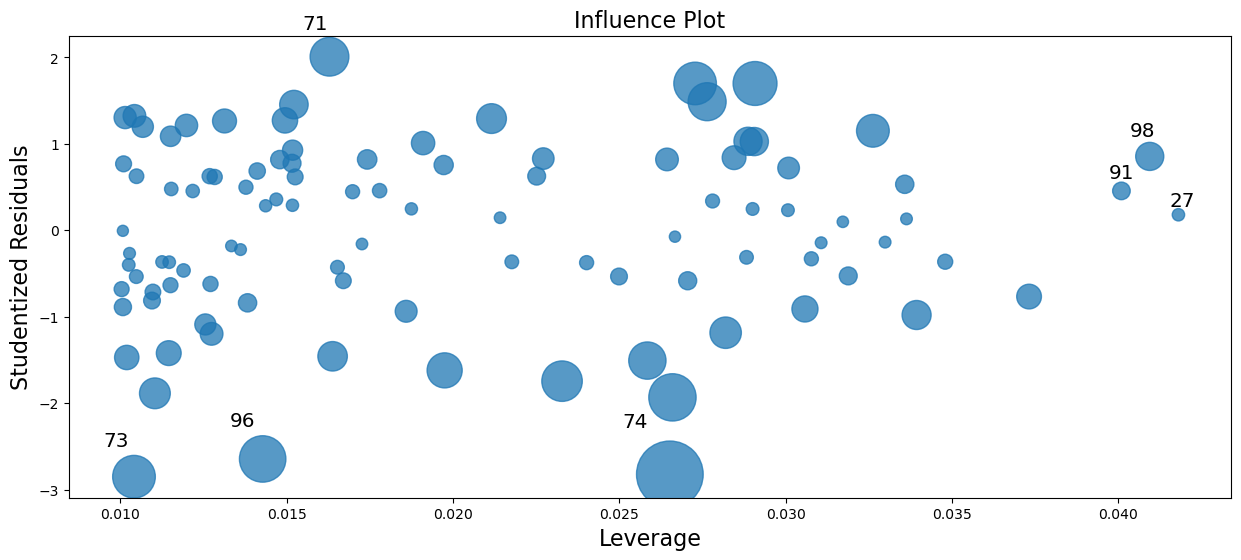

In [9]:
fig, ax = plt.subplots(figsize = (15, 6))
fig = influence_plot(m_df1, ax = ax)

There are no outliers/leverages.

In [11]:
m_df1.params

Intercept    0.238070
x            4.984259
dtype: float64

We have estimated the intercept ($\beta_0$) to be approximately **0.238** *(the intercept of the regression line - that is, the predicted value when x = 0)* and the slope ($\beta_1$) to be approximately **4.984** *(the slope of the regression line represents the rate of change in y as x changes)*:
$$\text{y} = 0.238 + 4.984 \cdot \text{x}$$

In [13]:
m_df1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     4579.
Date:                Sat, 23 Nov 2024   Prob (F-statistic):           4.47e-84
Time:                        22:26:53   Log-Likelihood:                -206.03
No. Observations:                 100   AIC:                             416.1
Df Residuals:                      98   BIC:                             421.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2381      0.469      0.508      0.613      -0.693       1.169
x              4.9843      0.074     67.669      0.000       4.838       5.130
==============================================================================
Omnibus:                        4.971   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                4.783
Skew:                          -0.536   Prob(JB):                       0.0915
Kurtosis:                       2.988   Cond. No.                         15.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- **R-squared**: *R-squared is the coefficient of determination that tells us that how much percentage variation independent variable can be explained by independent variable. The maximum possible value of R-squared can be 1, means the larger the R-squared value better the regression.* Here, **97.9 %** variation in y can be explained by x.
- **Adj. R-squared**: *Compared to R-squared which can only increase, Adjusted R-squared has the capability to decrease with the addition of less significant variables, thus resulting in a more reliable and accurate evaluation.* Here, **97.9 %** (= R-squared) variation in y can be explained by x.

Conditions, such as **linearity**, **nearly normal residuals**, and **constant variability**, for the least squares line, are met; for your reference, *please see details below*.

In [16]:
intercept_df1, slope_df1 = m_df1.params
df1["y_est"] = intercept_df1 + slope_df1 * df1.x

In [17]:
df1.head()

,y,x,y_est
0,38.858144,7.266278,36.455079
1,40.891148,7.985333,40.039034
2,48.971648,9.387120,47.025903
3,46.410124,9.382849,47.004618
4,25.333391,5.240903,26.360086


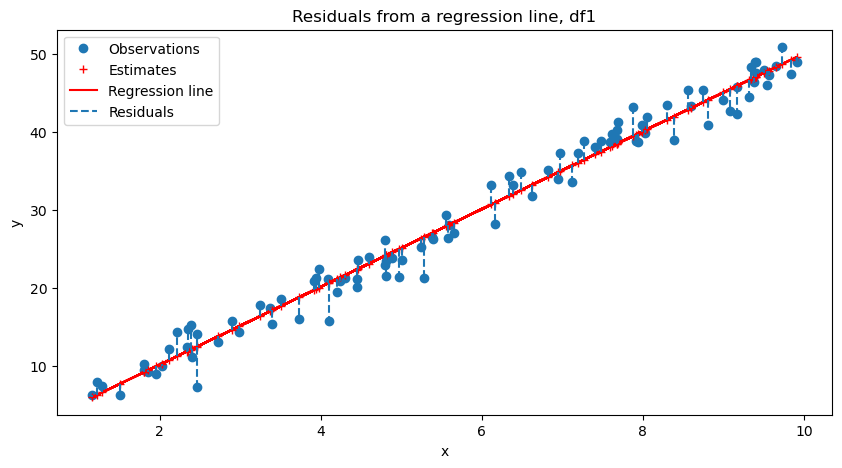

In [18]:
fig = plt.figure(figsize = (10, 5))
plt.plot(df1.x, df1.y, "o", label = "Observations")
plt.plot(df1.x, df1.y_est, "r+", label = "Estimates")
plt.plot(df1.x, df1.y_est, "r-", label = "Regression line")
plt.vlines(df1.x, df1.y_est, df1.y, linestyles = "dashed", label = "Residuals")
plt.title("Residuals from a regression line, df1")
plt.xlabel("x")
plt.ylabel("y")
plt.legend();

The regression line goes approximately through the center of the cloud of points: roughly one-half of the points lie above the regression line and another half lie below.

count    1.000000e+02
mean    -1.708855e-14
std      1.908727e+00
min     -5.254912e+00
25%     -1.133296e+00
50%      2.630865e-01
75%      1.472735e+00
max      3.763343e+00
Name: y_res, dtype: float64

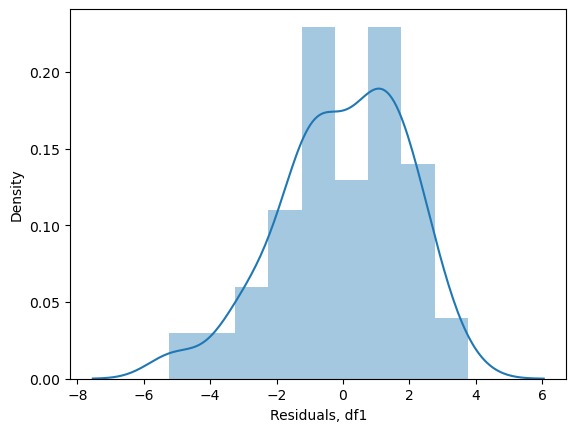

In [20]:
df1["y_res"] = df1["y"] - df1["y_est"]
sns.distplot(df1.y_res)
plt.xlabel("Residuals, df1");
df1["y_res"].describe()

The residuals are nearly normal.

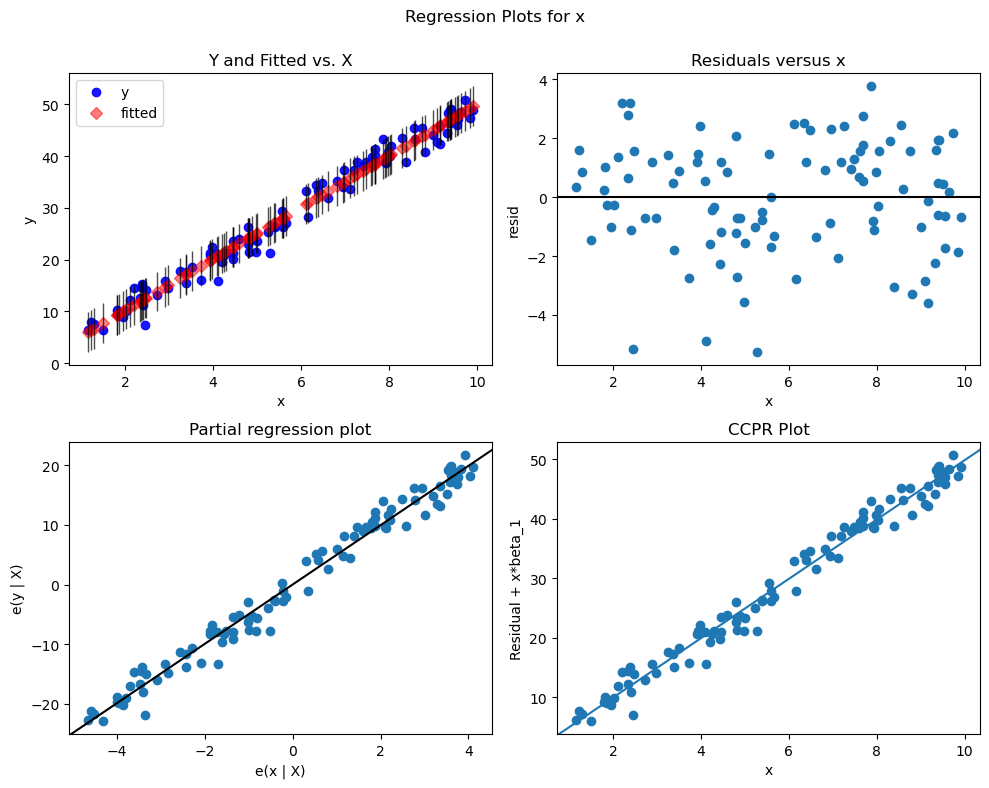

In [22]:
fig = plt.figure(figsize = (10, 8))
fig = plot_regress_exog(m_df1, "x", fig = fig)

The variability of points around the least squares line remains roughly constant.

## Set 2

In [25]:
df2.head()

,y,x
0,28.045621,4.299210
1,39.148284,4.528143
2,17.361044,3.284988
3,18.413561,5.709732
4,7.857464,3.242708


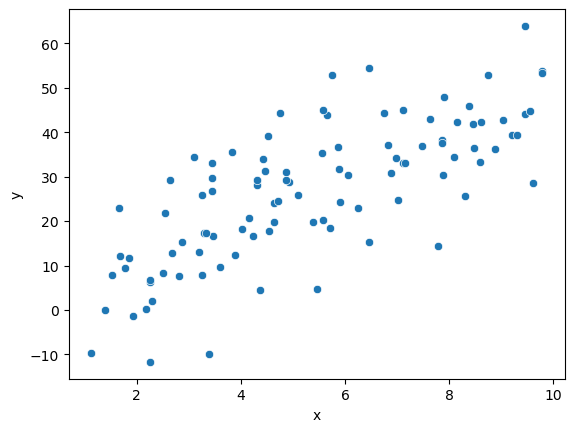

In [26]:
sns.scatterplot(data = df2, x = "x", y = "y");

The data show a linear trend.

In [28]:
m_df2 = sm.ols(formula = "y ~ x", data = df2).fit()

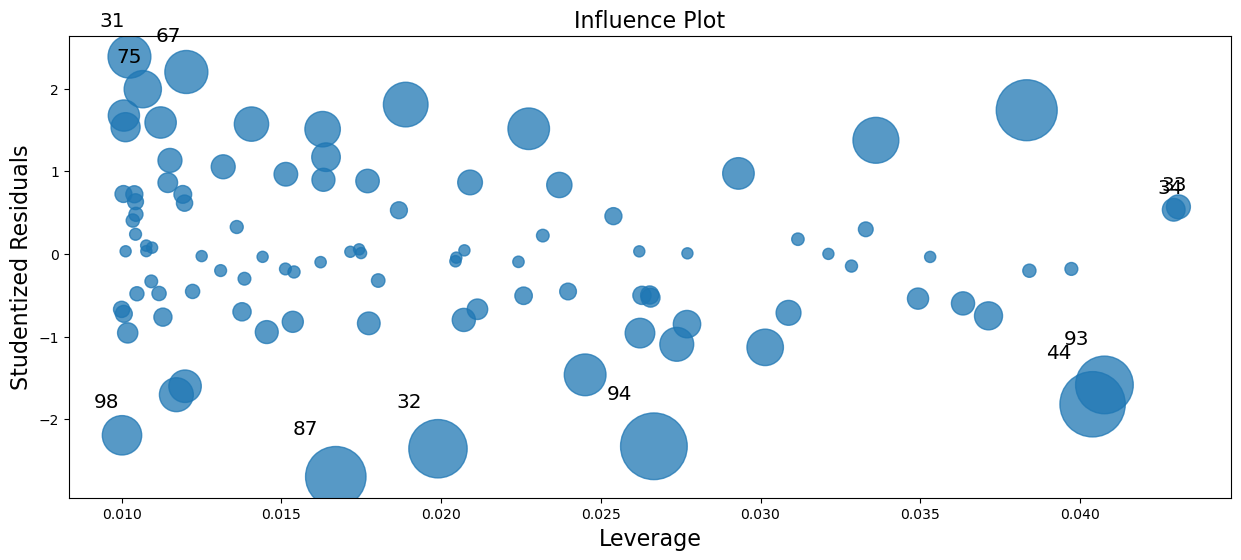

In [29]:
fig, ax = plt.subplots(figsize = (15, 6))
fig = influence_plot(m_df2, ax = ax)

There are no outliers/leverages.

In [31]:
m_df2.params

Intercept    1.095552
x            4.777354
dtype: float64

We have estimated the intercept ($\beta_0$) to be approximately **1.096** *(the intercept of the regression line - that is, the predicted value when x = 0)* and the slope ($\beta_1$) to be approximately **4.777** *(the slope of the regression line represents the rate of change in y as x changes)*:
$$\text{y} = 1.096 + 4.777 \cdot \text{x}$$

In [33]:
m_df2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     122.4
Date:                Sat, 23 Nov 2024   Prob (F-statistic):           6.11e-19
Time:                        22:26:54   Log-Likelihood:                -375.73
No. Observations:                 100   AIC:                             755.5
Df Residuals:                      98   BIC:                             760.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0956      2.547      0.430      0.668      -3.958       6.149
x              4.7774      0.432     11.062      0.000       3.920       5.634
==============================================================================
Omnibus:                        0.254   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.881   Jarque-Bera (JB):                0.079
Skew:                          -0.065   Prob(JB):                        0.961
Kurtosis:                       3.045   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- **R-squared**: *R-squared is the coefficient of determination that tells us that how much percentage variation independent variable can be explained by independent variable. The maximum possible value of R-squared can be 1, means the larger the R-squared value better the regression.* Here, **55.5 %** variation in y can be explained by x.
- **Adj. R-squared**: *Compared to R-squared which can only increase, Adjusted R-squared has the capability to decrease with the addition of less significant variables, thus resulting in a more reliable and accurate evaluation.* Here, **55.1 %** variation in y can be explained by x.

Conditions, such as **linearity**, **nearly normal residuals**, and **constant variability**, for the least squares line, are met; for your reference, *please see details below*.

In [36]:
intercept_df2, slope_df2 = m_df2.params
df2["y_est"] = intercept_df2 + slope_df2 * df2.x

In [37]:
df2.head()

,y,x,y_est
0,28.045621,4.299210,21.634397
1,39.148284,4.528143,22.728095
2,17.361044,3.284988,16.789103
3,18.413561,5.709732,28.372961
4,7.857464,3.242708,16.587117


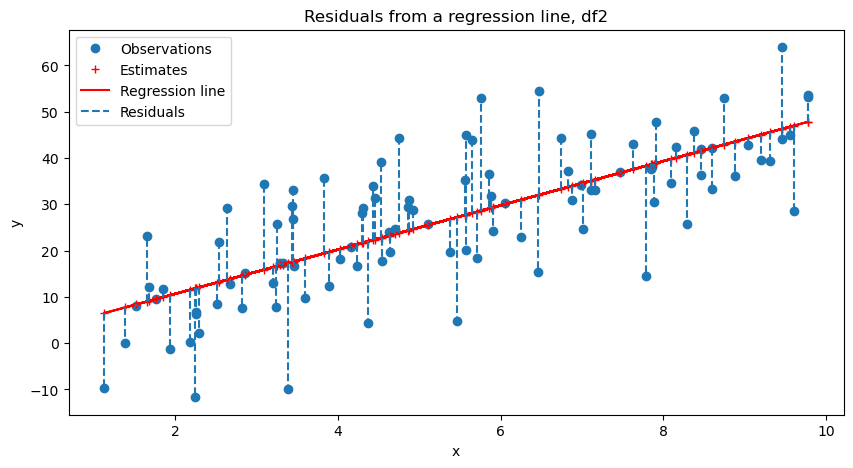

In [38]:
fig = plt.figure(figsize = (10, 5))
plt.plot(df2.x, df2.y, "o", label = "Observations")
plt.plot(df2.x, df2.y_est, "r+", label = "Estimates")
plt.plot(df2.x, df2.y_est, "r-", label = "Regression line")
plt.vlines(df2.x, df2.y_est, df2.y, linestyles = "dashed", label = "Residuals")
plt.title("Residuals from a regression line, df2") 
plt.xlabel("x")
plt.ylabel("y")
plt.legend();

The regression line goes approximately through the center of the cloud of points: roughly one-half of the points lie above the regression line and another half lie below.

count    1.000000e+02
mean    -7.496226e-15
std      1.041688e+01
min     -2.713100e+01
25%     -6.370633e+00
50%     -3.255999e-01
75%      6.825796e+00
max      2.427189e+01
Name: y_res, dtype: float64

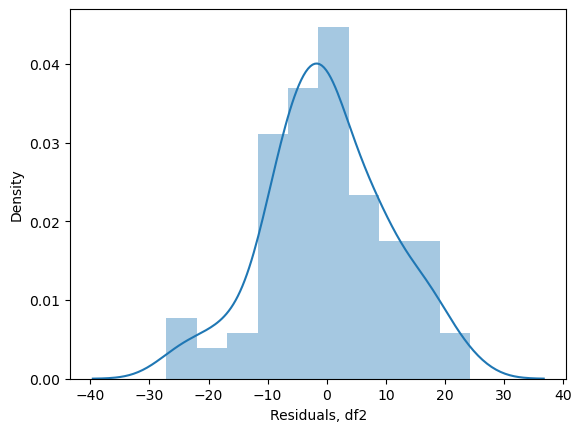

In [40]:
df2["y_res"] = df2["y"] - df2["y_est"]
sns.distplot(df2.y_res)
plt.xlabel("Residuals, df2");
df2["y_res"].describe()

The residuals are nearly normal.

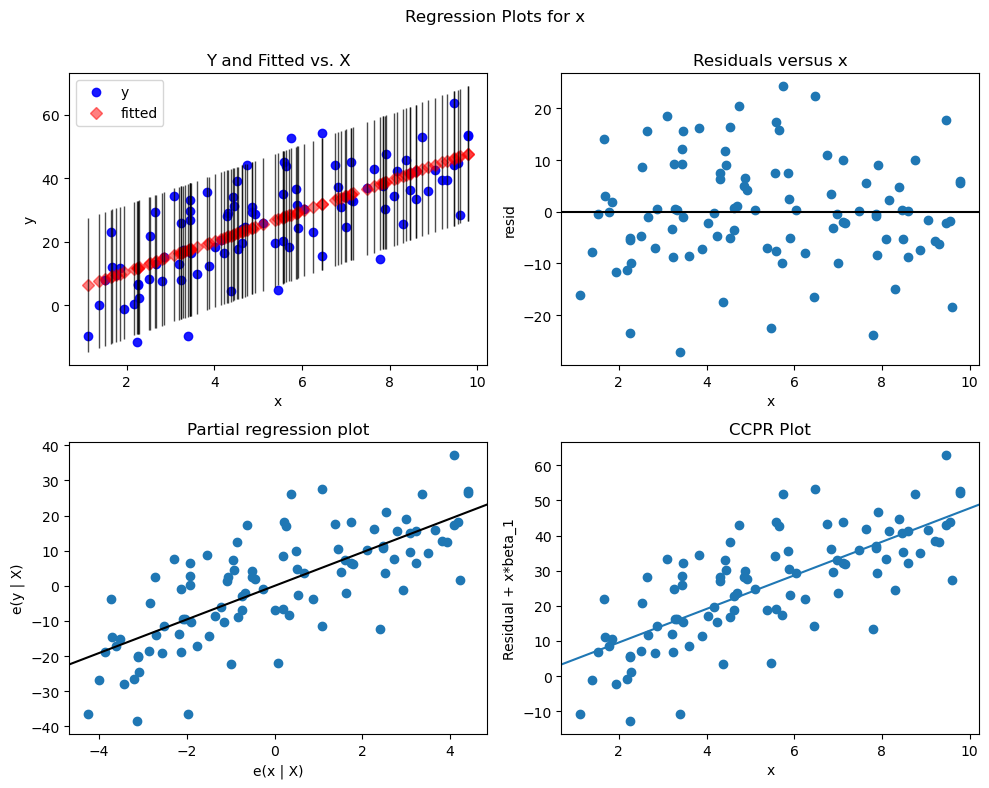

In [42]:
fig = plt.figure(figsize = (10, 8))
fig = plot_regress_exog(m_df2, "x", fig = fig)

The variability of points around the least squares line remains roughly constant.

## Set 3

In [45]:
df3.head()

,Y,x
0,6428.915770,9.517
1,2640.000728,5.113
2,12858.599267,9.773
3,5491.450053,8.428
4,2838.820108,5.752


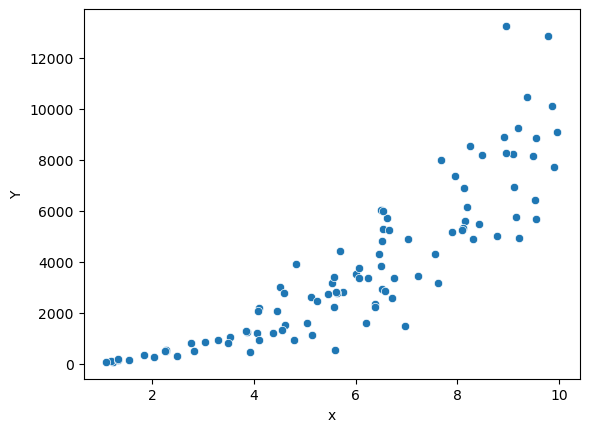

In [46]:
sns.scatterplot(data = df3, x = "x", y = "Y");

Regression analysis is easier to perform on linear data. When data are nonlinear, it is often possible to transform the data in a way that makes the resulting relationship linear, *please see below*.

In [48]:
df3["sqrt_Y"] = np.sqrt(df3.Y)
df3["boxcox_Y"], lmbda_df3 = scipy.stats.boxcox(df3.Y)
df3.head()

,Y,x,sqrt_Y,boxcox_Y
0,6428.915770,9.517,80.180520,78.994369
1,2640.000728,5.113,51.380937,54.763335
2,12858.599267,9.773,113.395764,104.769880
3,5491.450053,8.428,74.104319,74.057879
4,2838.820108,5.752,53.280579,56.435874


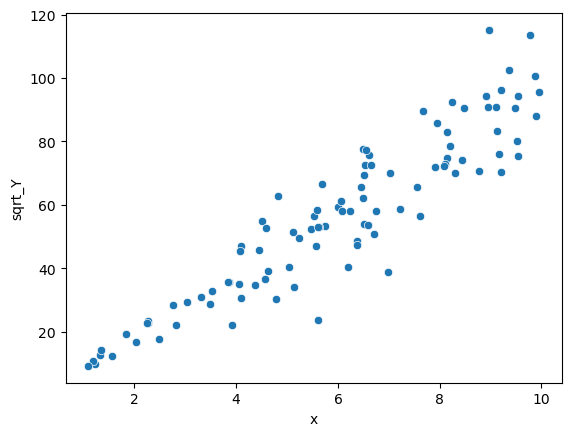

In [49]:
sns.scatterplot(data = df3, x = "x", y = "sqrt_Y");

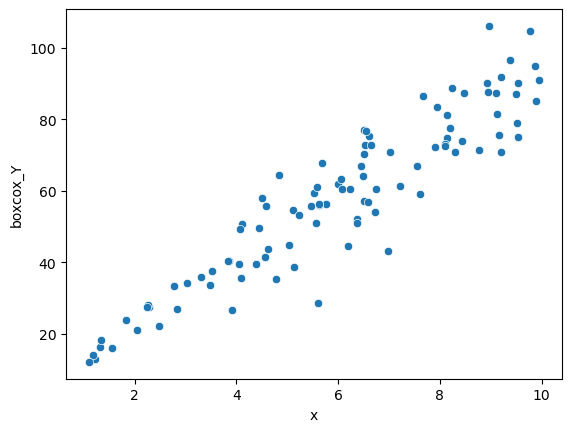

In [50]:
sns.scatterplot(data = df3, x = "x", y = "boxcox_Y");

In [51]:
m_df3 = sm.ols(formula = "boxcox_Y ~ x", data = df3).fit()

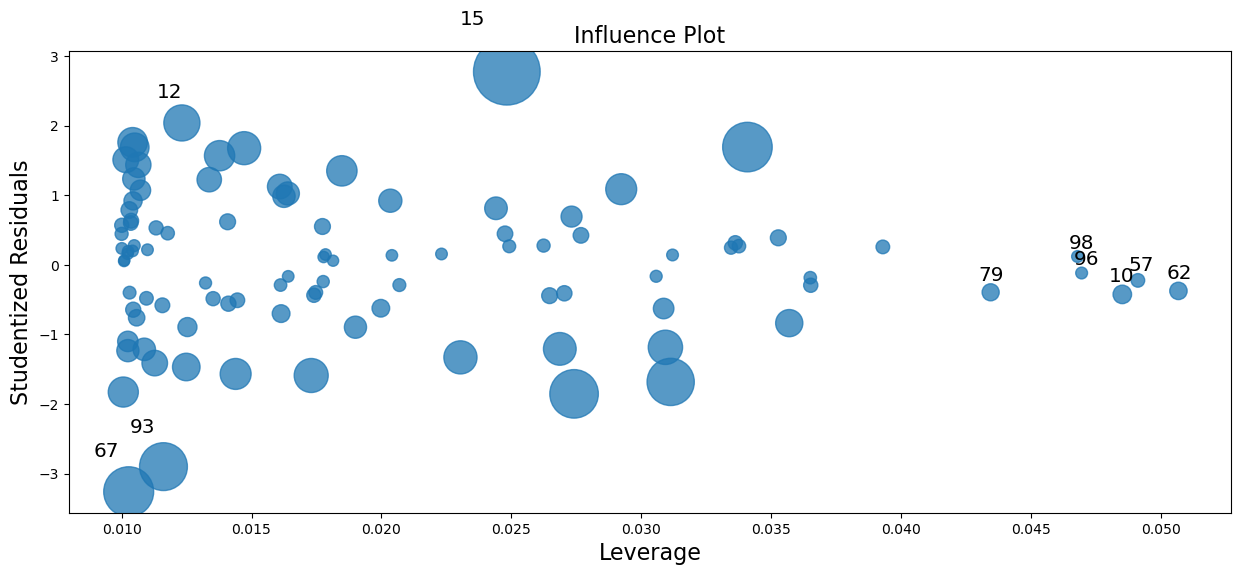

In [52]:
fig, ax = plt.subplots(figsize = (15, 6))
fig = influence_plot(m_df3, ax = ax)

There are outliers/leverages.

In [54]:
m_df3.params

Intercept    5.741774
x            8.722855
dtype: float64

We have estimated the intercept ($\beta_0$) to be approximately **5.742** *(the intercept of the regression line - that is, the predicted value when x = 0)* and the slope ($\beta_1$) to be approximately **8.723** *(the slope of the regression line represents the rate of change in y as x changes)*:
$$\text{y} = 5.742 + 8.723 \cdot \text{x}$$

In [56]:
m_df3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               boxcox_Y   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     641.8
Date:                Sat, 23 Nov 2024   Prob (F-statistic):           8.32e-45
Time:                        22:26:56   Log-Likelihood:                -353.39
No. Observations:                 100   AIC:                             710.8
Df Residuals:                      98   BIC:                             716.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7418      2.229      2.576      0.011       1.319      10.165
x              8.7229      0.344     25.333      0.000       8.040       9.406
==============================================================================
Omnibus:                        3.044   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.218   Jarque-Bera (JB):                2.483
Skew:                          -0.254   Prob(JB):                        0.289
Kurtosis:                       3.582   Cond. No.                         17.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- **R-squared**: *R-squared is the coefficient of determination that tells us that how much percentage variation independent variable can be explained by independent variable. The maximum possible value of R-squared can be 1, means the larger the R-squared value better the regression.* Here, **86.8 %** variation in y can be explained by x.
- **Adj. R-squared**: *Compared to R-squared which can only increase, Adjusted R-squared has the capability to decrease with the addition of less significant variables, thus resulting in a more reliable and accurate evaluation.* Here, **86.6 %** variation in y can be explained by x.

In [58]:
df3_no_outliers = df3.drop([15, 67, 93])

In [59]:
m_df3_no_outliers = sm.ols(formula = "boxcox_Y ~ x", data = df3_no_outliers).fit()

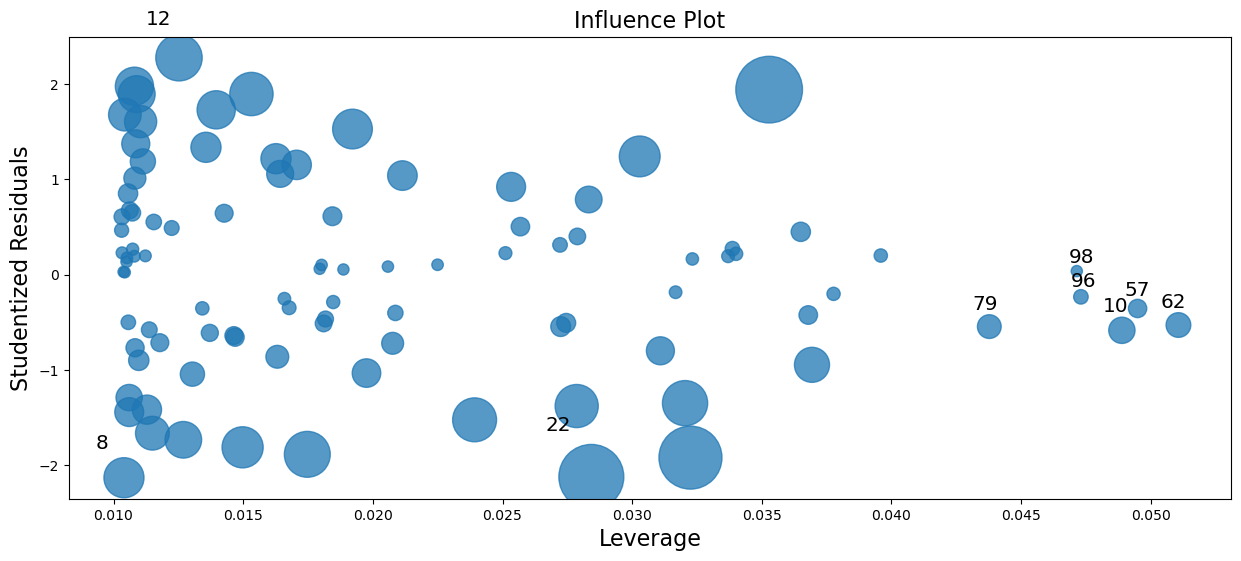

In [60]:
fig, ax = plt.subplots(figsize = (15, 6))
fig = influence_plot(m_df3_no_outliers, ax = ax)

There are no outliers/leverages.

In [62]:
m_df3_no_outliers.params

Intercept    6.557557
x            8.632766
dtype: float64

We have estimated the intercept ($\beta_0$) to be approximately **6.558** *(the intercept of the regression line - that is, the predicted value when x = 0)* and the slope ($\beta_1$) to be approximately **8.633** *(the slope of the regression line represents the rate of change in y as x changes)*:
$$\text{y} = 6.558 + 8.633 \cdot \text{x}$$

In [64]:
m_df3_no_outliers.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               boxcox_Y   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     798.8
Date:                Sat, 23 Nov 2024   Prob (F-statistic):           4.94e-48
Time:                        22:26:56   Log-Likelihood:                -330.30
No. Observations:                  97   AIC:                             664.6
Df Residuals:                      95   BIC:                             669.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5576      1.969      3.331      0.001       2.649      10.466
x              8.6328      0.305     28.263      0.000       8.026       9.239
==============================================================================
Omnibus:                        0.871   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.647   Jarque-Bera (JB):                0.877
Skew:                           0.038   Prob(JB):                        0.645
Kurtosis:                       2.540   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- **R-squared**: *R-squared is the coefficient of determination that tells us that how much percentage variation independent variable can be explained by independent variable. The maximum possible value of R-squared can be 1, means the larger the R-squared value better the regression.* Here, **89.4 %** variation in y can be explained by x. 
- **Adj. R-squared**: *Compared to R-squared which can only increase, Adjusted R-squared has the capability to decrease with the addition of less significant variables, thus resulting in a more reliable and accurate evaluation.* Here, **89.3 %** variation in y can be explained by x.

- I - **with outliers/leverages**:
coef = 8.7229; std err = 0.344; t = 25.333; P>|t| = 0.000; interval [0.025 0.975] = 8.040 9.406
- II - **without outliers/leverages**:
coef = 8.6328; std err = 0.305; t = 28.263; P>|t| = 0.000; interval [0.025 0.975] = 8.026 9.239

In the second case, the coefficient is slightly smaller; correspondingly, the 95% interval for the coefficient is a bit shifted. However, the 95% interval mostly overlaps; as a result, we may assume that the change in coefficient value is statistically insignificant.

- H0: the difference in coef. values is zero
- HA: the difference in coef. values is non-zero

In [69]:
obs_diff_df3 = 8.7229 - 8.6328
se_df3 = np.sqrt(np.power(0.344, 2) + np.power(0.305, 2))

In [70]:
# p-value:
(1 - scipy.stats.norm.cdf(obs_diff_df3 / se_df3)) * 2

0.8446256046257785

**p-value** is **0.845** - thus, we cannot reject the null hypothesis; the change in coefficient value is insignificant and we do **not** need to remove the outliers from the dataset.

Conditions, such as **linearity**, **nearly normal residuals**, and **constant variability**, for the least squares line, are met; for your reference, *please see details below*.

In [73]:
intercept_df3, slope_df3 = m_df3.params
df3["y_est"] = intercept_df3 + slope_df3 * df3.x

In [74]:
df3.head()

,Y,x,sqrt_Y,boxcox_Y,y_est
0,6428.915770,9.517,80.180520,78.994369,88.757187
1,2640.000728,5.113,51.380937,54.763335,50.341733
2,12858.599267,9.773,113.395764,104.769880,90.990238
3,5491.450053,8.428,74.104319,74.057879,79.257998
4,2838.820108,5.752,53.280579,56.435874,55.915637


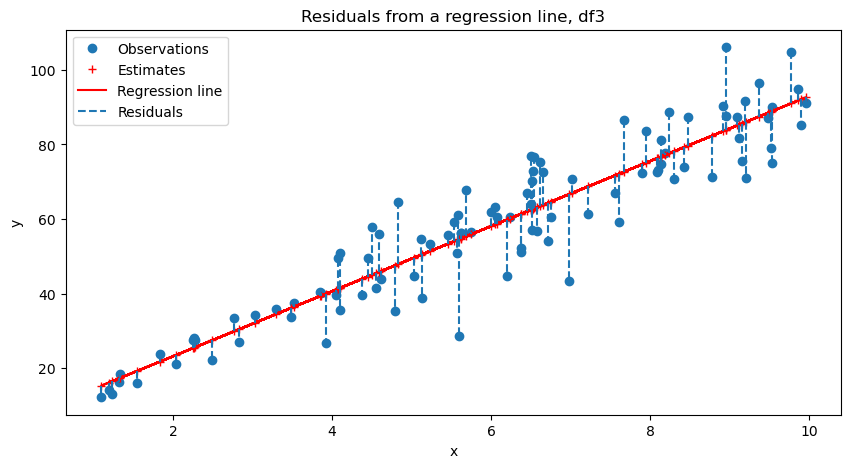

In [75]:
fig = plt.figure(figsize = (10, 5))
plt.plot(df3.x, df3.boxcox_Y, "o", label = "Observations")
plt.plot(df3.x, df3.y_est, "r+", label = "Estimates")
plt.plot(df3.x, df3.y_est, "r-", label = "Regression line")
plt.vlines(df3.x, df3.y_est, df3.boxcox_Y, linestyles = "dashed", label = "Residuals")
plt.title("Residuals from a regression line, df3")
plt.xlabel("x")
plt.ylabel("y")
plt.legend();

The regression line goes approximately through the center of the cloud of points: roughly one-half of the points lie above the regression line and another half lie below.

count    1.000000e+02
mean     1.630696e-14
std      8.330976e+00
min     -2.592434e+01
25%     -4.363414e+00
50%      9.475701e-01
75%      4.805561e+00
max      2.218360e+01
Name: y_res, dtype: float64

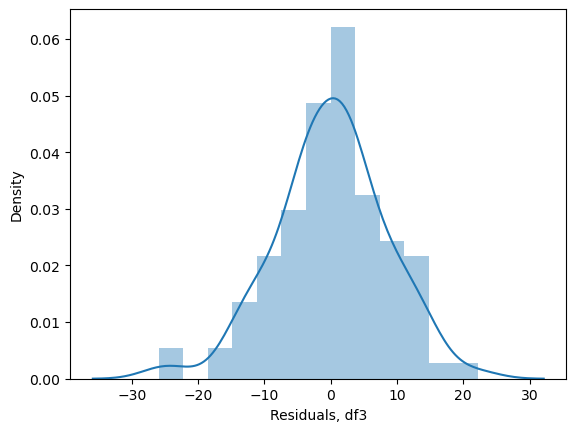

In [77]:
df3["y_res"] = df3["boxcox_Y"] - df3["y_est"]
sns.distplot(df3.y_res)
plt.xlabel("Residuals, df3");
df3["y_res"].describe()

The residuals are nearly normal.

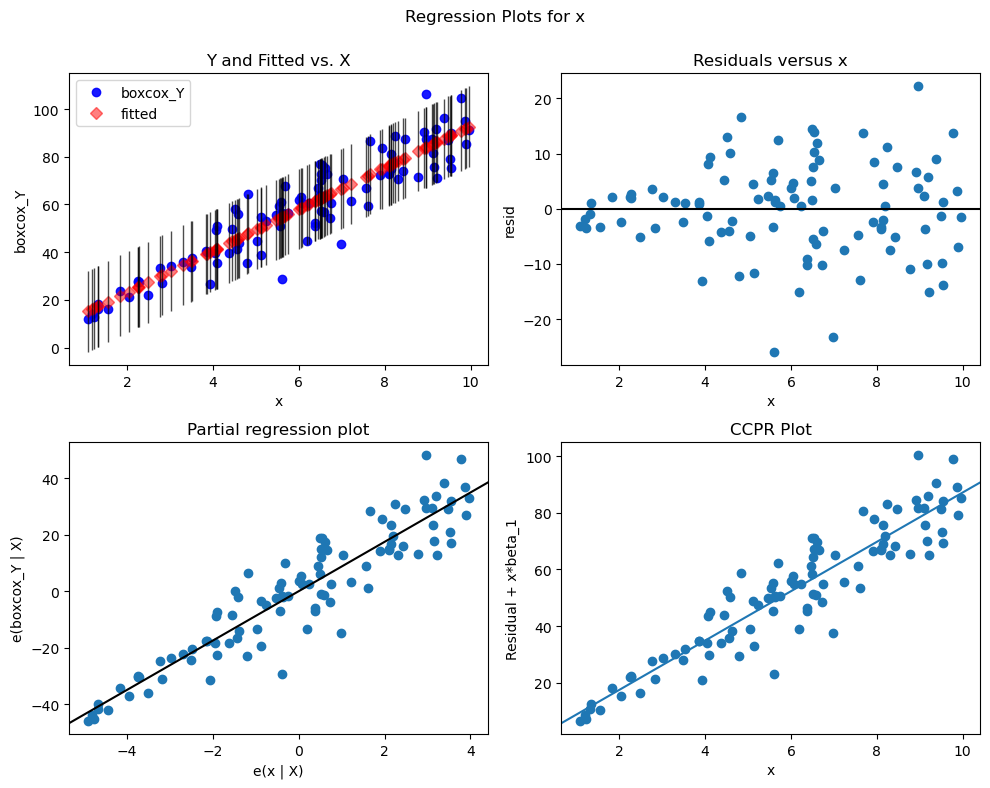

In [79]:
fig = plt.figure(figsize = (10, 8))
fig = plot_regress_exog(m_df3, "x", fig = fig)

The variability of points around the least squares line remains roughly constant.

In [81]:
df3_nonlinear = df3.drop(columns = ["sqrt_Y", "boxcox_Y", "y_est", "y_res"])

In [82]:
df3_nonlinear.head()

,Y,x
0,6428.915770,9.517
1,2640.000728,5.113
2,12858.599267,9.773
3,5491.450053,8.428
4,2838.820108,5.752


In [83]:
m_df3_nonlinear = sm.ols(formula = "Y ~ x", data = df3_nonlinear).fit()

In [84]:
m_df3_nonlinear.params

Intercept   -2636.174839
x            1081.826591
dtype: float64

We have estimated the intercept ($\beta_0$) to be approximately **-2636.175** *(the intercept of the regression line - that is, the predicted value when x = 0)* and the slope ($\beta_1$) to be approximately **1081.827** *(the slope of the regression line represents the rate of change in y as x changes)*:
$$\text{y} = -2636.175 + 1081.827 \cdot \text{x}$$

In [86]:
m_df3_nonlinear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     302.4
Date:                Sat, 23 Nov 2024   Prob (F-statistic):           1.04e-31
Time:                        22:26:57   Log-Likelihood:                -873.07
No. Observations:                 100   AIC:                             1750.
Df Residuals:                      98   BIC:                             1755.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2636.1748    402.741     -6.546      0.000   -3435.400   -1836.949
x           1081.8266     62.216     17.388      0.000     958.361    1205.292
==============================================================================
Omnibus:                       21.170   Durbin-Watson:                   2.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.896
Skew:                           0.863   Prob(JB):                     5.90e-09
Kurtosis:                       5.474   Cond. No.                         17.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- **R-squared**: *R-squared is the coefficient of determination that tells us that how much percentage variation independent variable can be explained by independent variable. The maximum possible value of R-squared can be 1, means the larger the R-squared value better the regression.* Here, **75.5 %** (box-cox transformation: **>85 %**) variation in y can be explained by x. 
- **Adj. R-squared**: *Compared to R-squared which can only increase, Adjusted R-squared has the capability to decrease with the addition of less significant variables, thus resulting in a more reliable and accurate evaluation.* Here, **75.3 %** (box-cox transformation: **>85 %**) variation in y can be explained by x.

Conditions, such as **linearity**, **normal residuals**, and **constant variability**, for the least squares line, are **not** met; for your reference, *please see details below*. Box-Cox represents a potential best practice where normalizing data or equalizing variance is desired.

In [89]:
intercept_df3_nonlinear, slope_df3_nonlinear = m_df3_nonlinear.params
df3_nonlinear["y_est"] = intercept_df3_nonlinear + slope_df3_nonlinear * df3_nonlinear.x

In [90]:
df3_nonlinear.head()

,Y,x,y_est
0,6428.915770,9.517,7659.568829
1,2640.000728,5.113,2895.204522
2,12858.599267,9.773,7936.516437
3,5491.450053,8.428,6481.459671
4,2838.820108,5.752,3586.491713


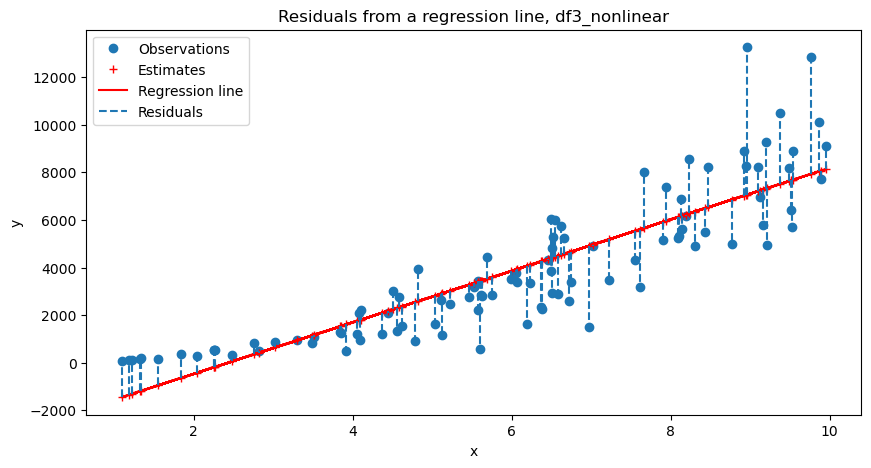

In [91]:
fig = plt.figure(figsize = (10, 5))
plt.plot(df3_nonlinear.x, df3_nonlinear.Y, "o", label = "Observations")
plt.plot(df3_nonlinear.x, df3_nonlinear.y_est, "r+", label = "Estimates")
plt.plot(df3_nonlinear.x, df3_nonlinear.y_est, "r-", label = "Regression line")
plt.vlines(df3_nonlinear.x, df3_nonlinear.y_est, df3_nonlinear.Y, linestyles = "dashed", label = "Residuals")
plt.title("Residuals from a regression line, df3_nonlinear")
plt.xlabel("x")
plt.ylabel("y")
plt.legend();

The regression line does not go through the center of the cloud of points.

count    1.000000e+02
mean     8.844836e-13
std      1.505310e+03
min     -3.406664e+03
25%     -8.943890e+02
50%     -1.251402e+02
75%      9.320867e+02
max      6.202119e+03
Name: y_res, dtype: float64

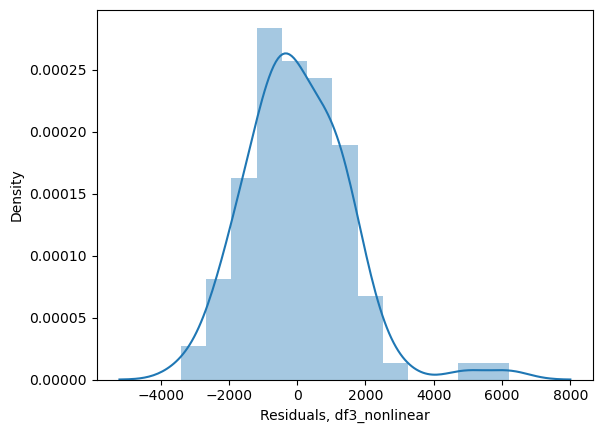

In [93]:
df3_nonlinear["y_res"] = df3_nonlinear["Y"] - df3_nonlinear["y_est"]
sns.distplot(df3_nonlinear.y_res)
plt.xlabel("Residuals, df3_nonlinear");
df3_nonlinear["y_res"].describe()

The residuals are not normal.

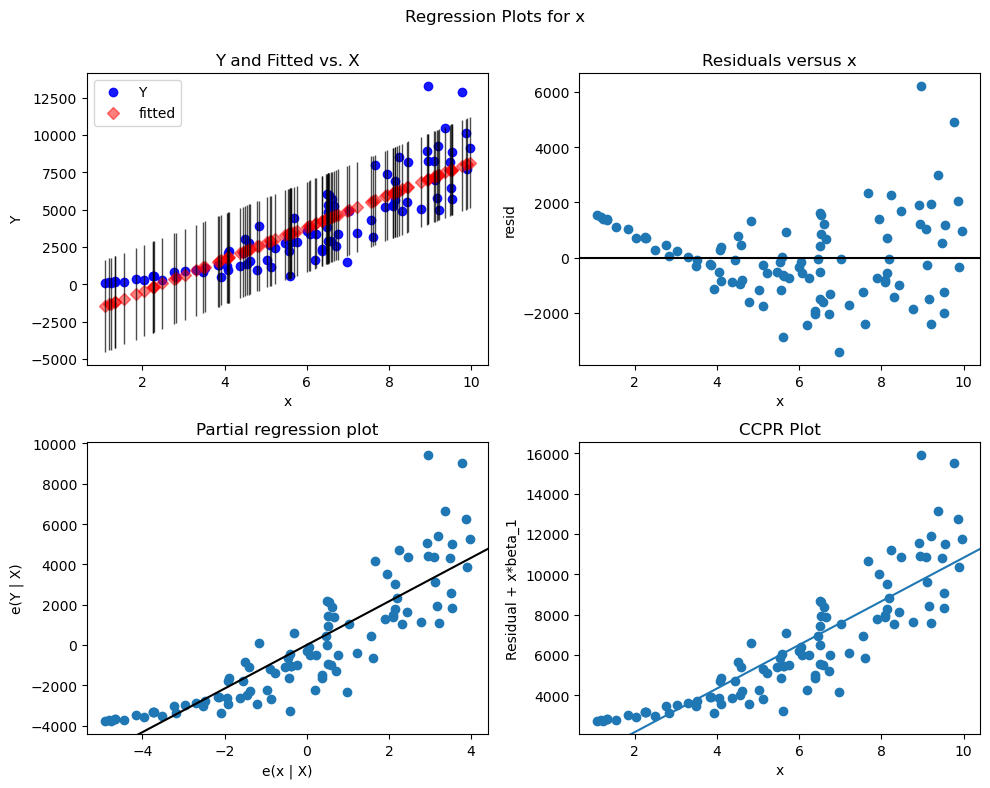

In [95]:
fig = plt.figure(figsize = (10, 8))
fig = plot_regress_exog(m_df3_nonlinear, "x", fig = fig)

The variability of points around the least squares line does not remain constant.

## Set 4

In [98]:
df4.head()

,Y,x
0,1.887192e+05,5.9947
1,7.107264e+03,3.9492
2,3.729064e+06,9.6353
3,5.691779e+02,0.4943
4,3.022130e+06,9.0811


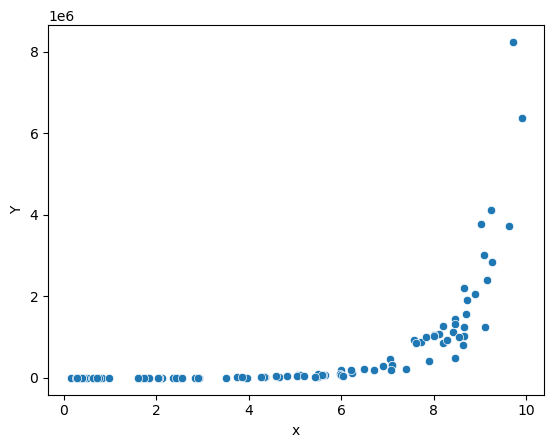

In [99]:
sns.scatterplot(data = df4, x = "x", y = "Y");

Regression analysis is easier to perform on linear data. When data are nonlinear, it is often possible to transform the data in a way that makes the resulting relationship linear, *please see below*.

In [101]:
df4["log_Y"] = np.log(df4.Y)
df4["boxcox_Y"], lmbda_df4 = scipy.stats.boxcox(df4.Y)
df4.head()

,Y,x,log_Y,boxcox_Y
0,1.887192e+05,5.9947,12.148015,15.845421
1,7.107264e+03,3.9492,8.868873,10.744711
2,3.729064e+06,9.6353,15.131668,21.137578
3,5.691779e+02,0.4943,6.344193,7.268976
4,3.022130e+06,9.0811,14.921472,20.742666


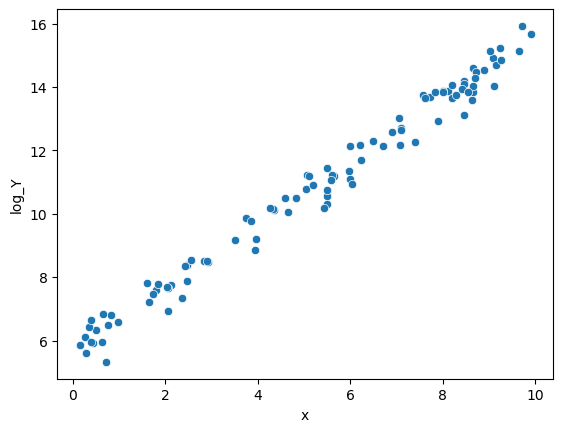

In [102]:
sns.scatterplot(data = df4, x = "x", y = "log_Y");

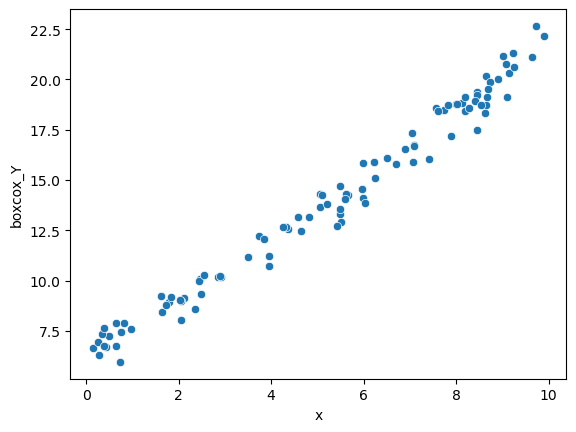

In [103]:
sns.scatterplot(data = df4, x = "x", y = "boxcox_Y");

In [104]:
m_df4 = sm.ols(formula = "boxcox_Y ~ x", data = df4).fit()

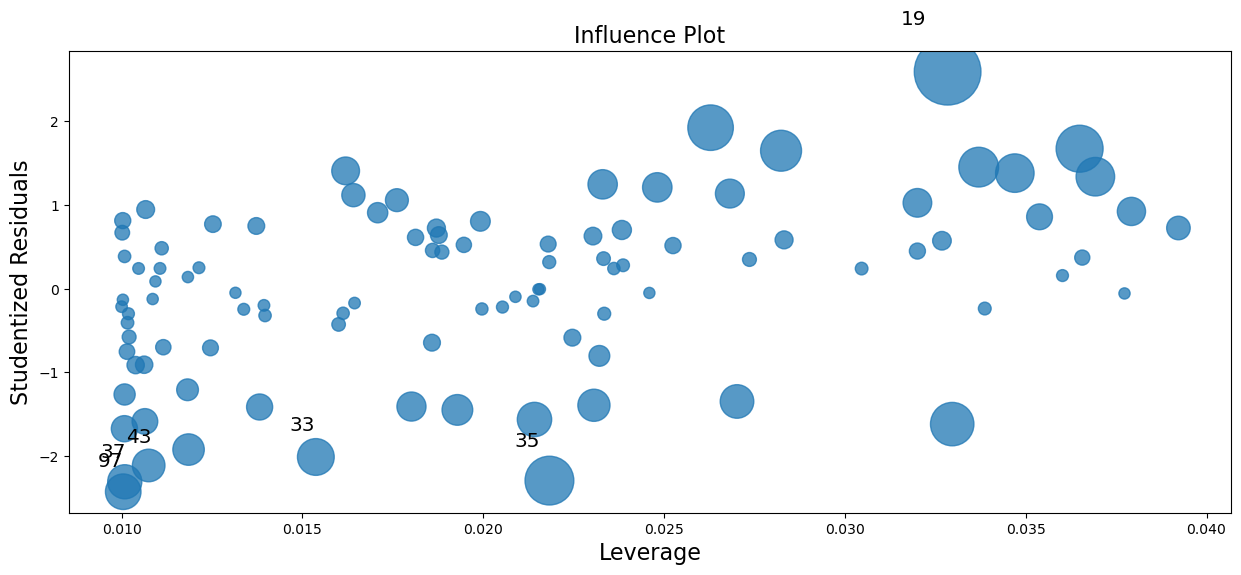

In [105]:
fig, ax = plt.subplots(figsize = (15, 6))
fig = influence_plot(m_df4, ax = ax)

There are no outliers/leverages.

In [107]:
m_df4.params

Intercept    5.92622
x            1.54720
dtype: float64

We have estimated the intercept ($\beta_0$) to be approximately **5.926** *(the intercept of the regression line - that is, the predicted value when x = 0)* and the slope ($\beta_1$) to be approximately **1.547** *(the slope of a regression line represents the rate of change in y as x changes)*:
$$\text{y} = 5.926 + 1.547 \cdot \text{x}$$

In [109]:
m_df4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               boxcox_Y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     4512.
Date:                Sat, 23 Nov 2024   Prob (F-statistic):           9.06e-84
Time:                        22:26:59   Log-Likelihood:                -102.95
No. Observations:                 100   AIC:                             209.9
Df Residuals:                      98   BIC:                             215.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9262      0.138     42.789      0.000       5.651       6.201
x              1.5472      0.023     67.174      0.000       1.501       1.593
==============================================================================
Omnibus:                        2.768   Durbin-Watson:                   2.185
Prob(Omnibus):                  0.251   Jarque-Bera (JB):                2.703
Skew:                          -0.394   Prob(JB):                        0.259
Kurtosis:                       2.833   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- **R-squared**: *R-squared is the coefficient of determination that tells us that how much percentage variation independent variable can be explained by independent variable. The maximum possible value of R-squared can be 1, means the larger the R-squared value better the regression.* Here, **97.9 %** variation in y can be explained by x. 
- **Adj. R-squared**: *Compared to R-squared which can only increase, Adjusted R-squared has the capability to decrease with the addition of less significant variables, thus resulting in a more reliable and accurate evaluation.* Here, **97.9 %** (= R-squared) variation in y can be explained by x.

Conditions, such as **linearity**, **nearly normal residuals**, and **constant variability**, for the least squares line, are met; for your reference, *please see details below*.

In [112]:
intercept_df4, slope_df4 = m_df4.params
df4["y_est"] = intercept_df4 + slope_df4 * df4.x

In [113]:
df4.head()

,Y,x,log_Y,boxcox_Y,y_est
0,1.887192e+05,5.9947,12.148015,15.845421,15.201221
1,7.107264e+03,3.9492,8.868873,10.744711,12.036423
2,3.729064e+06,9.6353,15.131668,21.137578,20.833959
3,5.691779e+02,0.4943,6.344193,7.268976,6.691001
4,3.022130e+06,9.0811,14.921472,20.742666,19.976500


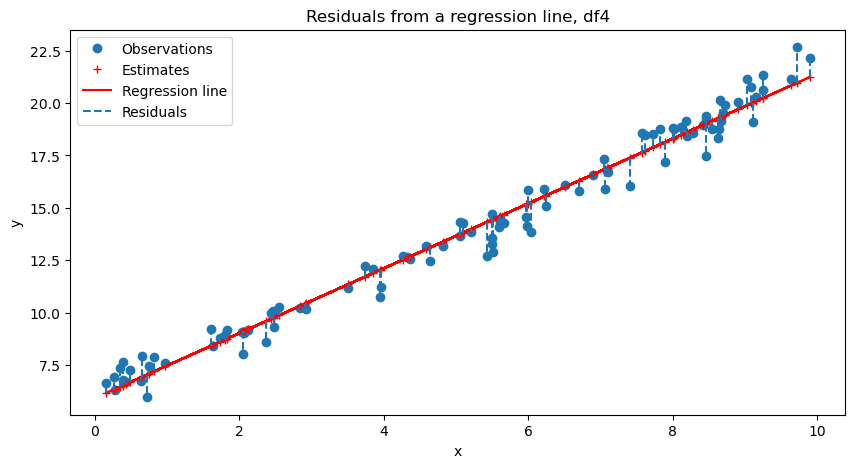

In [114]:
fig = plt.figure(figsize = (10, 5))
plt.plot(df4.x, df4.boxcox_Y, "o", label = "Observations")
plt.plot(df4.x, df4.y_est, "r+", label = "Estimates")
plt.plot(df4.x, df4.y_est, "r-", label = "Regression line")
plt.vlines(df4.x, df4.y_est, df4.boxcox_Y, linestyles = "dashed", label = "Residuals")
plt.title("Residuals from a regression line, df4")
plt.xlabel("x")
plt.ylabel("y")
plt.legend();

The regression line goes approximately through the center of the cloud of points: roughly one-half of the points lie above the regression line and another half lie below.

count    1.000000e+02
mean    -1.048051e-15
std      6.808612e-01
min     -1.614050e+00
25%     -3.959463e-01
50%      9.994008e-02
75%      4.613305e-01
max      1.696870e+00
Name: y_res, dtype: float64

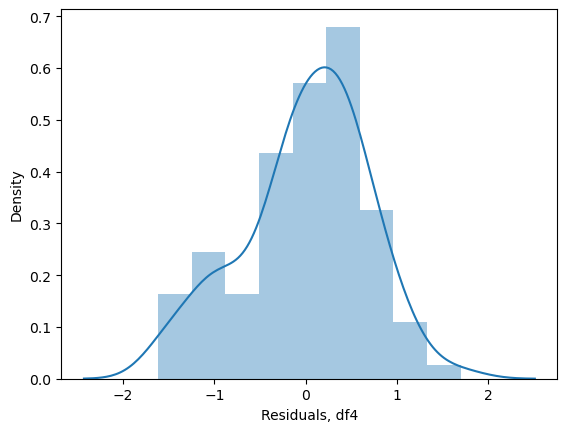

In [116]:
df4["y_res"] = df4["boxcox_Y"] - df4["y_est"]
sns.distplot(df4.y_res)
plt.xlabel("Residuals, df4");
df4["y_res"].describe()

The residuals are nearly normal.

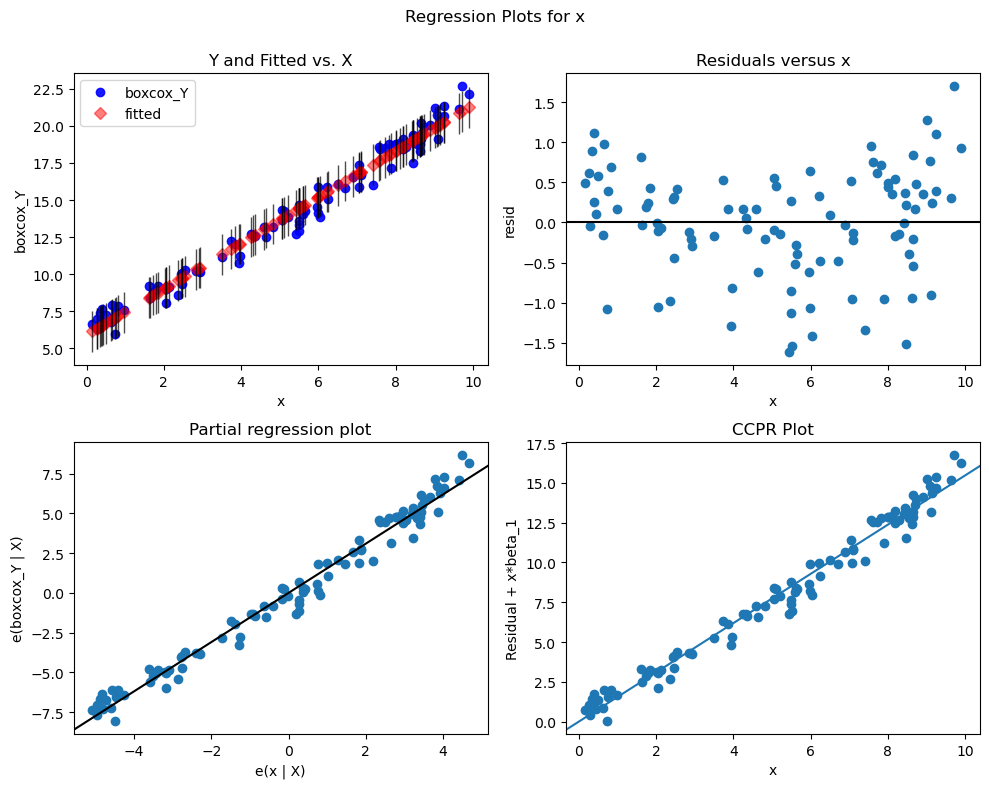

In [118]:
fig = plt.figure(figsize = (10, 8))
fig = plot_regress_exog(m_df4, "x", fig = fig)

The variability of points around the least squares line remains roughly constant.

In [120]:
df4_nonlinear = df4.drop(columns = ["log_Y", "boxcox_Y", "y_est", "y_res"])

In [121]:
df4_nonlinear.head()

,Y,x
0,1.887192e+05,5.9947
1,7.107264e+03,3.9492
2,3.729064e+06,9.6353
3,5.691779e+02,0.4943
4,3.022130e+06,9.0811


In [122]:
m_df4_nonlinear = sm.ols(formula = "Y ~ x", data = df4_nonlinear).fit()

In [123]:
m_df4_nonlinear.params

Intercept   -753498.668130
x            270653.490062
dtype: float64

We have estimated the intercept ($\beta_0$) to be approximately **-753498.668** *(the intercept of the regression line - that is, the predicted value when x = 0)* and the slope ($\beta_1$) to be approximately **270653.490** *(the slope of the regression line represents the rate of change in y as x changes)*:
$$\text{y} = -753498.668 + 270653.490 \cdot \text{x}$$

In [125]:
m_df4_nonlinear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     59.97
Date:                Sat, 23 Nov 2024   Prob (F-statistic):           8.87e-12
Time:                        22:27:00   Log-Likelihood:                -1526.2
No. Observations:                 100   AIC:                             3056.
Df Residuals:                      98   BIC:                             3062.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.535e+05    2.1e+05     -3.585      0.001   -1.17e+06   -3.36e+05
x           2.707e+05   3.49e+04      7.744      0.000    2.01e+05     3.4e+05
==============================================================================
Omnibus:                      102.143   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1253.666
Skew:                           3.381   Prob(JB):                    5.89e-273
Kurtosis:                      18.973   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- **R-squared**: *R-squared is the coefficient of determination that tells us that how much percentage variation independent variable can be explained by independent variable. The maximum possible value of R-squared can be 1, means the larger the R-squared value better the regression.* Here, **38.0 %** (box-cox transformation: **>95 %**) variation in y can be explained by x. 
- **Adj. R-squared**: *Compared to R-squared which can only increase, Adjusted R-squared has the capability to decrease with the addition of less significant variables, thus resulting in a more reliable and accurate evaluation.* Here, **37.3 %** (box-cox transformation: **>95 %**) variation in y can be explained by x.

Conditions, such as **linearity**, **normal residuals**, and **constant variability**, for the least squares line, are **not** met; for your reference, *please see details below*. Box-Cox represents a potential best practice where normalizing data or equalizing variance is desired.

In [128]:
intercept_df4_nonlinear, slope_df4_nonlinear = m_df4_nonlinear.params
df4_nonlinear["y_est"] = intercept_df4_nonlinear + slope_df4_nonlinear * df4_nonlinear.x

In [129]:
df4_nonlinear.head()

,Y,x,y_est
0,1.887192e+05,5.9947,8.689878e+05
1,7.107264e+03,3.9492,3.153661e+05
2,3.729064e+06,9.6353,1.854329e+06
3,5.691779e+02,0.4943,-6.197146e+05
4,3.022130e+06,9.0811,1.704333e+06


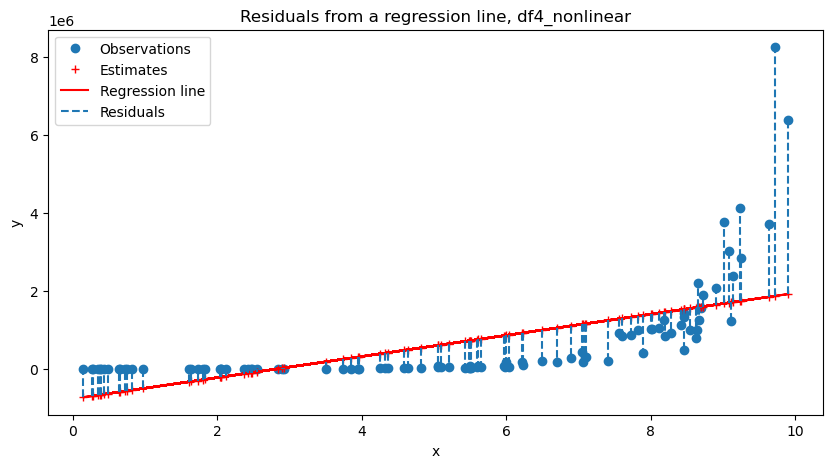

In [130]:
fig = plt.figure(figsize = (10, 5))
plt.plot(df4_nonlinear.x, df4_nonlinear.Y, "o", label = "Observations")
plt.plot(df4_nonlinear.x, df4_nonlinear.y_est, "r+", label = "Estimates")
plt.plot(df4_nonlinear.x, df4_nonlinear.y_est, "r-", label = "Regression line")
plt.vlines(df4_nonlinear.x, df4_nonlinear.y_est, df4_nonlinear.Y, linestyles = "dashed", label = "Residuals")
plt.title("Residuals from a regression line, df4_nonlinear")
plt.xlabel("x")
plt.ylabel("y")
plt.legend();

The regression line does not go through the center of the cloud of points.

count    1.000000e+02
mean     2.747402e-10
std      1.033103e+06
min     -1.039076e+06
25%     -6.187548e+05
50%     -3.081833e+05
75%      3.134527e+05
max      6.364011e+06
Name: y_res, dtype: float64

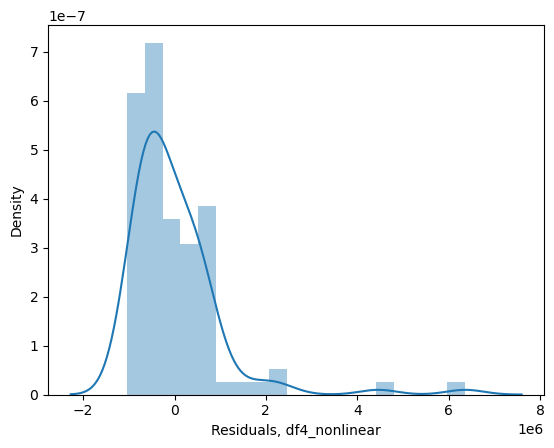

In [132]:
df4_nonlinear["y_res"] = df4_nonlinear["Y"] - df4_nonlinear["y_est"]
sns.distplot(df4_nonlinear.y_res)
plt.xlabel("Residuals, df4_nonlinear");
df4_nonlinear["y_res"].describe()

The residuals are not normal.

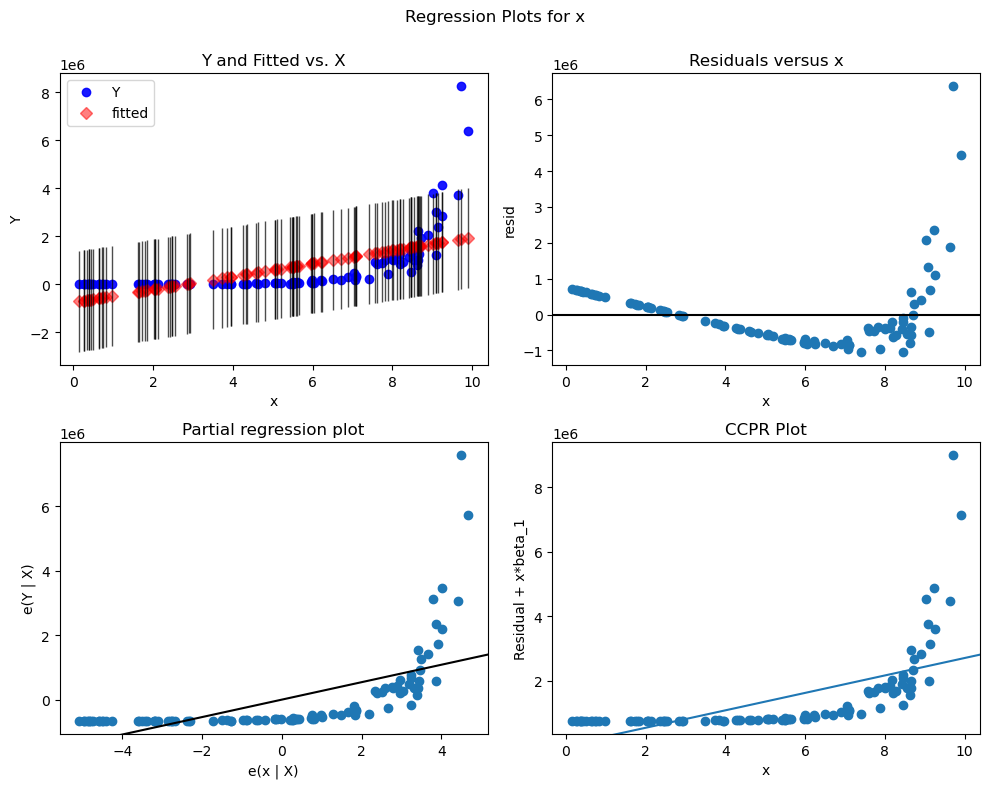

In [134]:
fig = plt.figure(figsize = (10, 8))
fig = plot_regress_exog(m_df4_nonlinear, "x", fig = fig)

The variability of points around the least squares line does not remain constant.

## Set 5

In [137]:
df5.head()

,Y,X
0,47.320319,9.0527
1,39.862491,7.3135
2,42.225779,8.6471
3,30.010689,5.8579
4,43.900459,7.9357


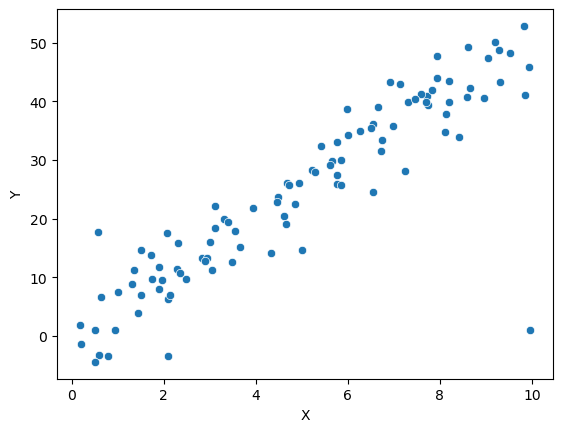

In [138]:
sns.scatterplot(data = df5, x = "X", y = "Y");

The data show a linear trend.

In [140]:
m_df5 = sm.ols(formula = "Y ~ X", data = df5).fit()

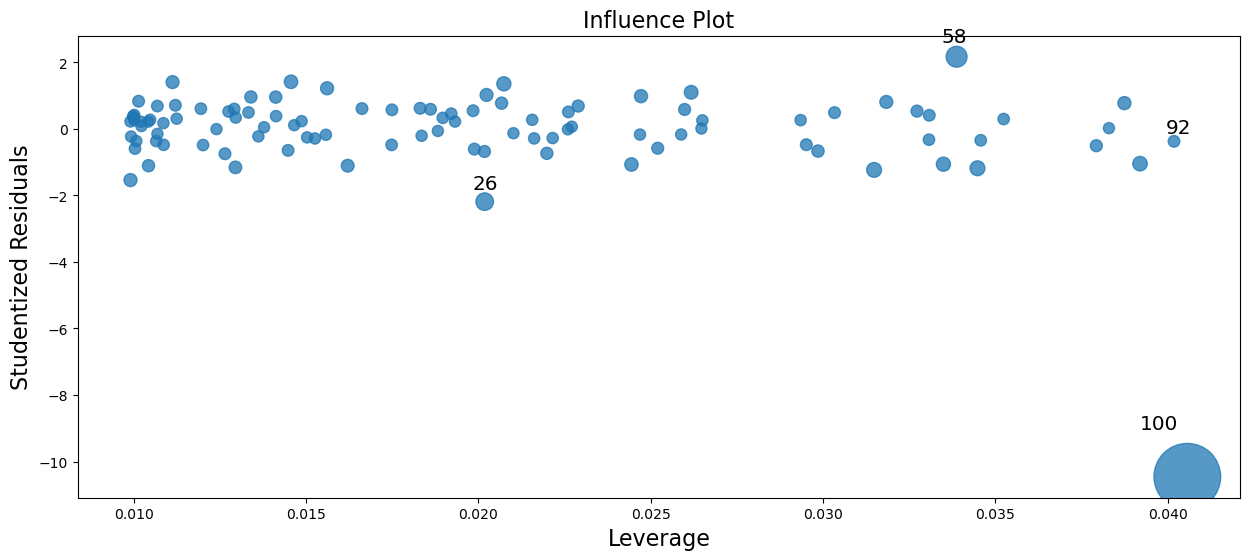

In [141]:
fig, ax = plt.subplots(figsize = (15, 6))
fig = influence_plot(m_df5, ax = ax)

There are outliers/leverages.

In [143]:
m_df5.params

Intercept    0.921257
X            4.767081
dtype: float64

We have estimated the intercept ($\beta_0$) to be approximately **0.921** *(the intercept of the regression line - that is, the predicted value when x = 0)* and the slope ($\beta_1$) to be approximately **4.767** *(the slope of the regression line represents the rate of change in y as x changes)*:
$$\text{y} = 0.921 + 4.767 \cdot \text{x}$$

In [145]:
m_df5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     411.9
Date:                Sat, 23 Nov 2024   Prob (F-statistic):           4.70e-37
Time:                        22:27:01   Log-Likelihood:                -334.42
No. Observations:                 101   AIC:                             672.8
Df Residuals:                      99   BIC:                             678.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9213      1.346      0.685      0.495      -1.749       3.591
X              4.7671      0.235     20.294      0.000       4.301       5.233
==============================================================================
Omnibus:                      113.783   Durbin-Watson:                   1.491
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2578.951
Skew:                          -3.591   Prob(JB):                         0.00
Kurtosis:                      26.691   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- **R-squared**: *R-squared is the coefficient of determination that tells us that how much percentage variation independent variable can be explained by independent variable. The maximum possible value of R-squared can be 1, means the larger the R-squared value better the regression.* Here, **80.6 %** variation in y can be explained by x.
- **Adj. R-squared**: *Compared to R-squared which can only increase, Adjusted R-squared has the capability to decrease with the addition of less significant variables, thus resulting in a more reliable and accurate evaluation.* Here, **80.4 %** variation in y can be explained by x.

In [147]:
df5_no_outliers = df5.drop([26, 58, 100])

In [148]:
m_df5_no_outliers = sm.ols(formula = "Y ~ X", data = df5_no_outliers).fit()

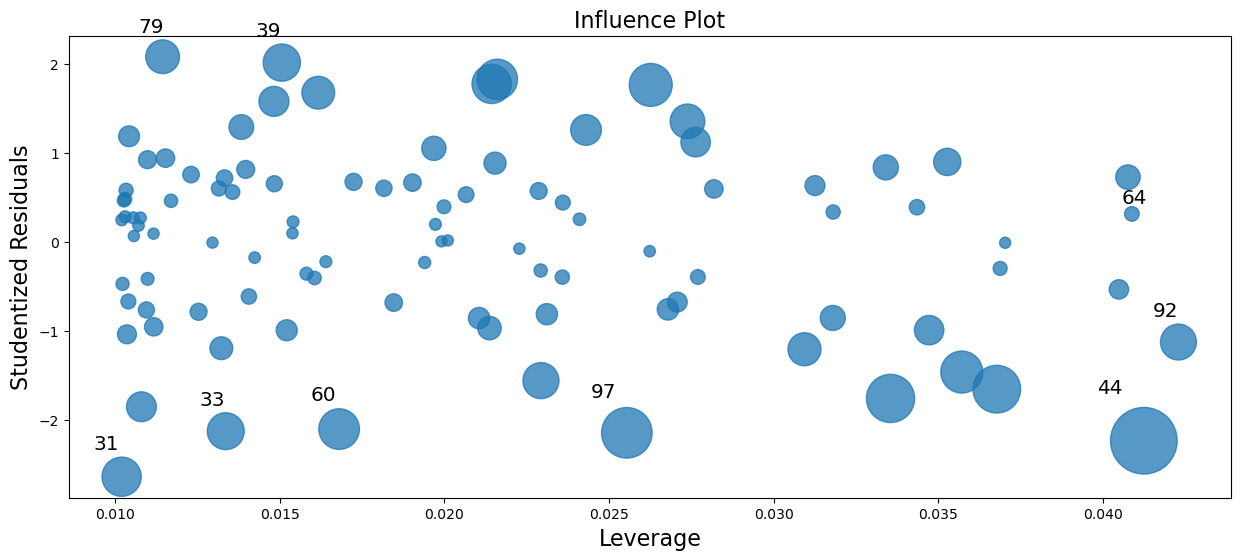

In [149]:
fig, ax = plt.subplots(figsize = (15, 6))
fig = influence_plot(m_df5_no_outliers, ax = ax)

There are no outliers/leverages.

In [151]:
m_df5_no_outliers.params

Intercept   -0.279157
X            5.104383
dtype: float64

We have estimated the intercept ($\beta_0$) to be approximately **-0.279** *(the intercept of the regression line - that is, the predicted value when x = 0)* and the slope ($\beta_1$) to be approximately **5.104** *(the slope of the regression line represents the rate of change in y as x changes)*:
$$\text{y} = -0.279 + 5.104 \cdot \text{x}$$

In [153]:
m_df5_no_outliers.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     1128.
Date:                Sat, 23 Nov 2024   Prob (F-statistic):           7.16e-55
Time:                        22:27:01   Log-Likelihood:                -278.47
No. Observations:                  98   AIC:                             560.9
Df Residuals:                      96   BIC:                             566.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2792      0.870     -0.321      0.749      -2.005       1.447
X              5.1044      0.152     33.592      0.000       4.803       5.406
==============================================================================
Omnibus:                        1.806   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.405   Jarque-Bera (JB):                1.828
Skew:                          -0.312   Prob(JB):                        0.401
Kurtosis:                       2.756   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- **R-squared**: *R-squared is the coefficient of determination that tells us that how much percentage variation independent variable can be explained by independent variable. The maximum possible value of R-squared can be 1, means the larger the R-squared value better the regression.* Here, **92.2 %** (with outliers/leverages: **around 80 %**) variation in y can be explained by x.
- **Adj. R-squared**: *Compared to R-squared which can only increase, Adjusted R-squared has the capability to decrease with the addition of less significant variables, thus resulting in a more reliable and accurate evaluation.* Here, **92.1 %** (with outliers/leverages: **around 80 %**) variation in y can be explained by x.

- I - **with outliers/leverages**:
coef = 4.7671; std err = 0.235; t = 20.294; P>|t| = 0.000; interval [0.025 0.975] = 4.301 5.233
- II - **without outliers/leverages**:
coef = 5.1044; std err = 0.152; t = 33.592; P>|t| = 0.000; interval [0.025 0.975] = 4.803 5.406

In the second case, the coefficient is slightly larger; correspondingly, the 95% interval for the coefficient is a bit shifted. However, the 95% interval mostly overlaps; as a result, we may assume that the change in coefficient value is statistically insignificant.

- H0: the difference in coef. values is zero
- HA: the difference in coef. values is non-zero

In [158]:
obs_diff_df5 = 5.1044 - 4.7671
se_df5 = np.sqrt(np.power(0.235, 2) + np.power(0.152, 2))

In [159]:
# p-value:
(1 - scipy.stats.norm.cdf(obs_diff_df5 / se_df5)) * 2

0.2281304646071345

**p-value** is **0.228** - thus, we cannot reject the null hypothesis; the change in coefficient value is insignificant and we do **not** need to remove the outliers from the dataset.

Conditions, such as **linearity**, **nearly normal residuals**, and **constant variability**, for the least squares line, are met; for your reference, *please see details below*.

In [162]:
intercept_df5, slope_df5 = m_df5.params
df5["y_est"] = intercept_df5 + slope_df5 * df5.X

In [163]:
df5.head()

,Y,X,y_est
0,47.320319,9.0527,44.076209
1,39.862491,7.3135,35.785302
2,42.225779,8.6471,42.142681
3,30.010689,5.8579,28.846339
4,43.900459,7.9357,38.751380


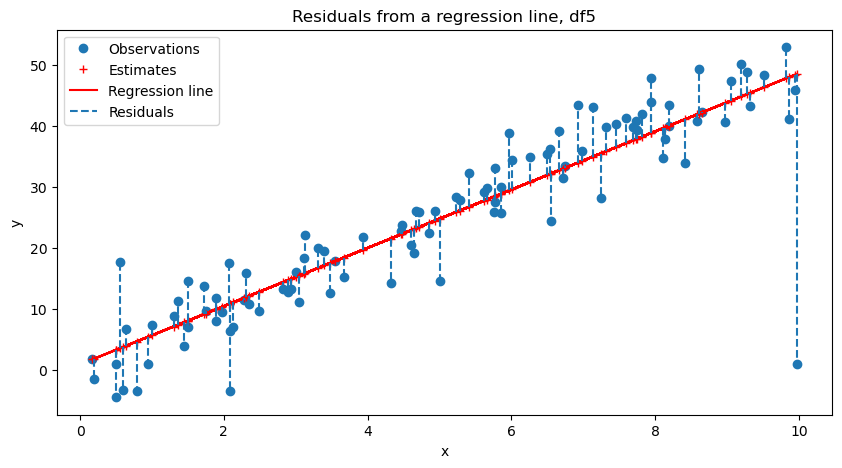

In [164]:
fig = plt.figure(figsize = (10, 5))
plt.plot(df5.X, df5.Y, "o", label = "Observations")
plt.plot(df5.X, df5.y_est, "r+", label = "Estimates")
plt.plot(df5.X, df5.y_est, "r-", label = "Regression line")
plt.vlines(df5.X, df5.y_est, df5.Y, linestyles = "dashed", label = "Residuals")
plt.title("Residuals from a regression line, df5")
plt.xlabel("x")
plt.ylabel("y")
plt.legend();

The regression line goes approximately through the center of the cloud of points: roughly one-half of the points lie above the regression line and another half lie below. There is one outlier far from the other points, though it only appears to slightly influence the line.

count    1.010000e+02
mean    -7.527532e-15
std      6.666383e+00
min     -4.742030e+01
25%     -2.449717e+00
50%      1.164350e+00
75%      3.542946e+00
max      1.403782e+01
Name: y_res, dtype: float64

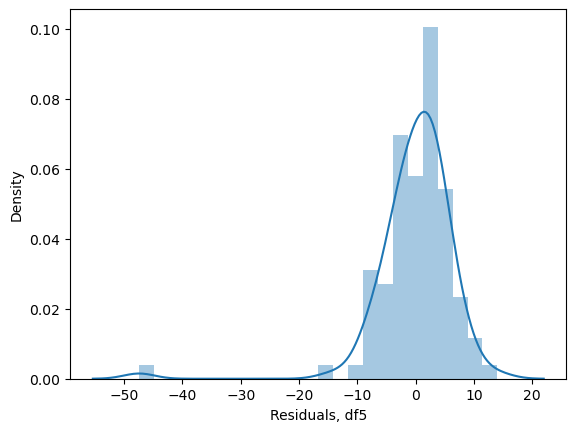

In [166]:
df5["y_res"] = df5["Y"] - df5["y_est"]
sns.distplot(df5.y_res)
plt.xlabel("Residuals, df5");
df5["y_res"].describe()

The residuals are nearly normal.

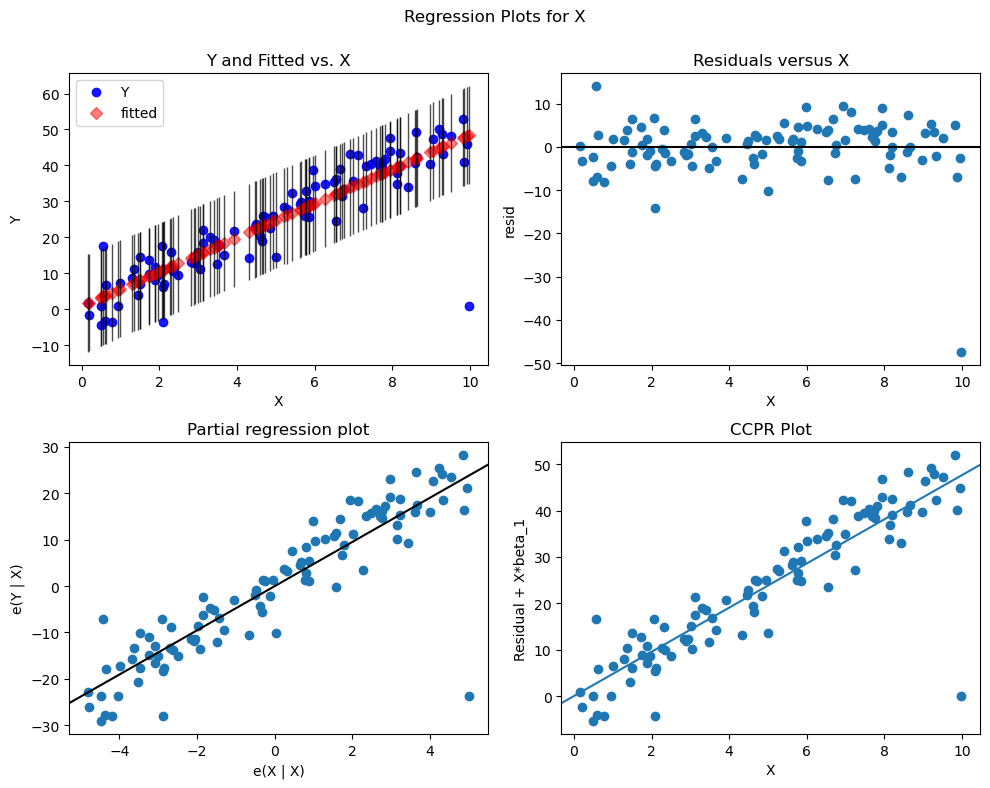

In [168]:
fig = plt.figure(figsize = (10, 8))
fig = plot_regress_exog(m_df5, "X", fig = fig)

The variability of points around the least squares line remains roughly constant.

## Set 6

In [171]:
df6.head()

,y,x
0,-2.764835,1.1290
1,61.065734,6.9100
2,52.854588,7.8374
3,-2.881062,0.1335
4,59.045448,9.2425


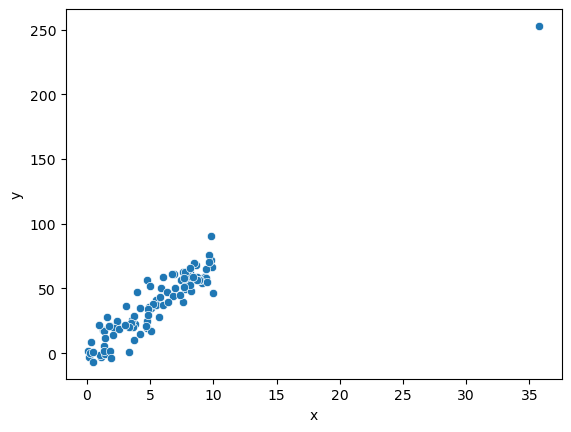

In [172]:
sns.scatterplot(data = df6, x = "x", y = "y");

The data show a linear trend.

In [174]:
m_df6 = sm.ols(formula = "y ~ x", data = df6).fit()

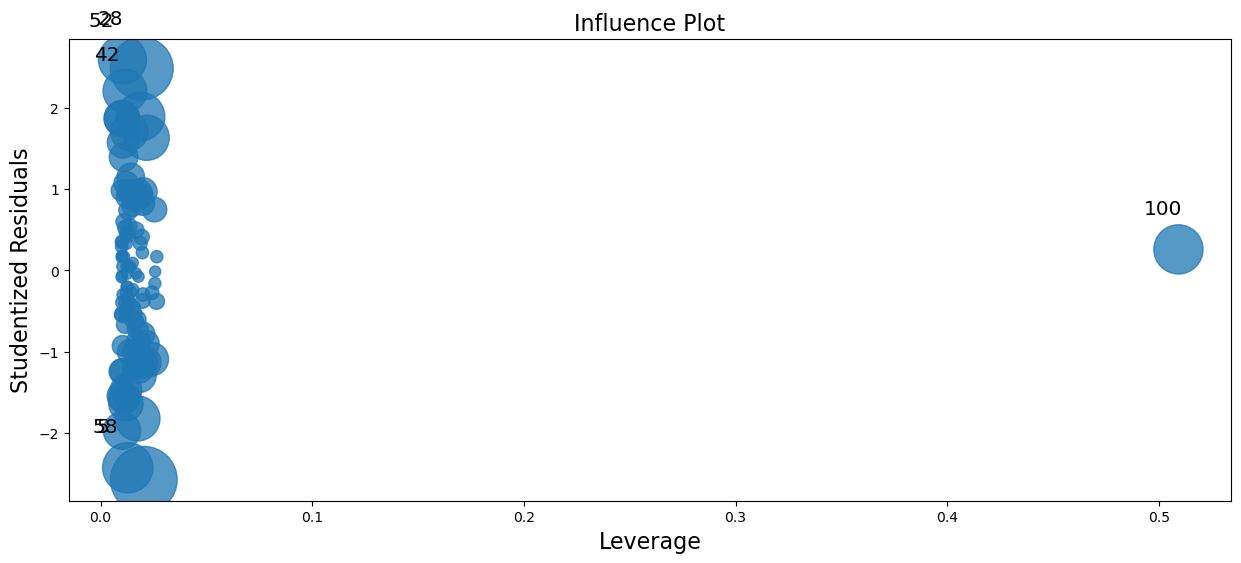

In [175]:
fig, ax = plt.subplots(figsize = (15, 6))
fig = influence_plot(m_df6, ax = ax)

There are outliers/leverages.

In [177]:
m_df6.params

Intercept   -0.305911
x            7.027216
dtype: float64

We have estimated the intercept ($\beta_0$) to be approximately **-0.306** *(the intercept of the regression line - that is, the predicted value when x = 0)* and the slope ($\beta_1$) to be approximately **7.027** *(the slope of the regression line represents the rate of change in y as x changes)*:
$$\text{y} = -0.306 + 7.027 \cdot \text{x}$$

In [179]:
m_df6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     1041.
Date:                Sat, 23 Nov 2024   Prob (F-statistic):           2.49e-54
Time:                        22:27:03   Log-Likelihood:                -367.52
No. Observations:                 101   AIC:                             739.0
Df Residuals:                      99   BIC:                             744.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3059      1.534     -0.199      0.842      -3.350       2.739
x              7.0272      0.218     32.259      0.000       6.595       7.459
==============================================================================
Omnibus:                        0.494   Durbin-Watson:                   2.255
Prob(Omnibus):                  0.781   Jarque-Bera (JB):                0.262
Skew:                           0.120   Prob(JB):                        0.877
Kurtosis:                       3.070   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- **R-squared**: *R-squared is the coefficient of determination that tells us that how much percentage variation independent variable can be explained by independent variable. The maximum possible value of R-squared can be 1, means the larger the R-squared value better the regression.* Here, **91.3 %** variation in y can be explained by x.
- **Adj. R-squared**: *Compared to R-squared which can only increase, Adjusted R-squared has the capability to decrease with the addition of less significant variables, thus resulting in a more reliable and accurate evaluation.* Here, **91.2 %** variation in y can be explained by x.

In [181]:
df6_no_outliers = df6.drop(100)

In [182]:
m_df6_no_outliers = sm.ols(formula = "y ~ x", data = df6_no_outliers).fit()

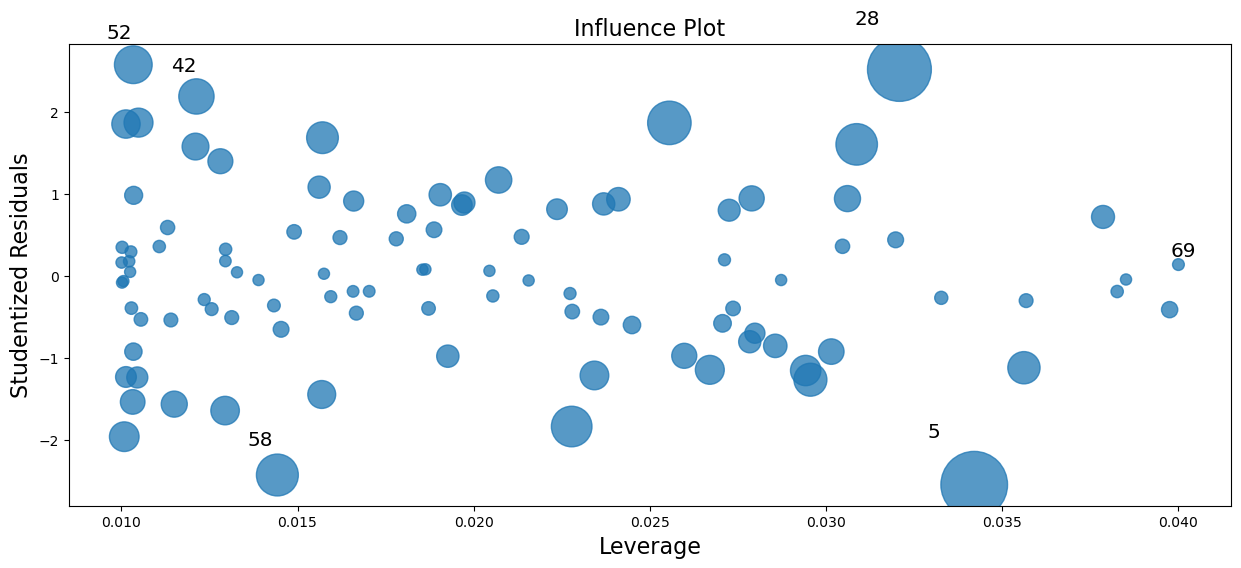

In [183]:
fig, ax = plt.subplots(figsize = (15, 6))
fig = influence_plot(m_df6_no_outliers, ax = ax)

There are no outliers/leverages.

In [185]:
m_df6_no_outliers.params

Intercept   -0.020325
x            6.970334
dtype: float64

We have estimated the intercept ($\beta_0$) to be approximately **-0.020** *(the intercept of the regression line - that is, the predicted value when x = 0)* and the slope ($\beta_1$) to be approximately **6.970** *(the slope of a regression line represents the rate of change in y as x changes)*:
$$\text{y} = -0.020 + 6.970 \cdot \text{x}$$

In [187]:
m_df6_no_outliers.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     502.7
Date:                Sat, 23 Nov 2024   Prob (F-statistic):           2.29e-40
Time:                        22:27:03   Log-Likelihood:                -364.34
No. Observations:                 100   AIC:                             732.7
Df Residuals:                      98   BIC:                             737.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0203      1.899     -0.011      0.991      -3.788       3.748
x              6.9703      0.311     22.420      0.000       6.353       7.587
==============================================================================
Omnibus:                        0.459   Durbin-Watson:                   2.259
Prob(Omnibus):                  0.795   Jarque-Bera (JB):                0.261
Skew:                           0.123   Prob(JB):                        0.877
Kurtosis:                       3.044   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- **R-squared**: *R-squared is the coefficient of determination that tells us that how much percentage variation independent variable can be explained by independent variable. The maximum possible value of R-squared can be 1, means the larger the R-squared value better the regression.* Here, **83.7 %** (with outliers/leverages: around **90 %**) variation in y can be explained by x.
- **Adj. R-squared**: *Compared to R-squared which can only increase, Adjusted R-squared has the capability to decrease with the addition of less significant variables, thus resulting in a more reliable and accurate evaluation.* Here, **83.5 %** (with outliers/leverages: around **90 %**) variation in y can be explained by x.

- I - **with outliers/leverages**:
coef = 7.0272; std err = 0.218; t = 32.259; P>|t| = 0.000; interval [0.025 0.975] = 6.595 7.459
- II - **without outliers/leverages**:
coef = 6.9703; std err = 0.311; t = 22.420; P>|t| = 0.000; interval [0.025 0.975] = 6.353 7.587

In the second case, the coefficient is slightly smaller; correspondingly, the 95% interval for the coefficient is a bit shifted. However, the 95% interval mostly overlaps; as a result, we may assume that the change in coefficient value is statistically insignificant.

- H0: the difference in coef. values is zero
- HA: the difference in coef. values is non-zero

In [192]:
obs_diff_df6 = 7.0272 - 6.9703
se_df6 = np.sqrt(np.power(0.218, 2) + np.power(0.311, 2))

In [193]:
# p-value:
(1 - scipy.stats.norm.cdf(obs_diff_df6 / se_df6)) * 2

0.8809087827329629

**p-value** is **0.881** - thus, we cannot reject the null hypothesis; the change in coefficient value is insignificant and we do **not** need to remove the outliers from the dataset.

Conditions, such as **linearity**, **nearly normal residuals**, and **constant variability**, for the least squares line, are met; for your reference, *please see details below*.

In [196]:
intercept_df6, slope_df6 = m_df6.params
df6["y_est"] = intercept_df6 + slope_df6 * df6.x

In [197]:
df6.head()

,y,x,y_est
0,-2.764835,1.1290,7.627816
1,61.065734,6.9100,48.252153
2,52.854588,7.8374,54.769193
3,-2.881062,0.1335,0.632223
4,59.045448,9.2425,64.643134


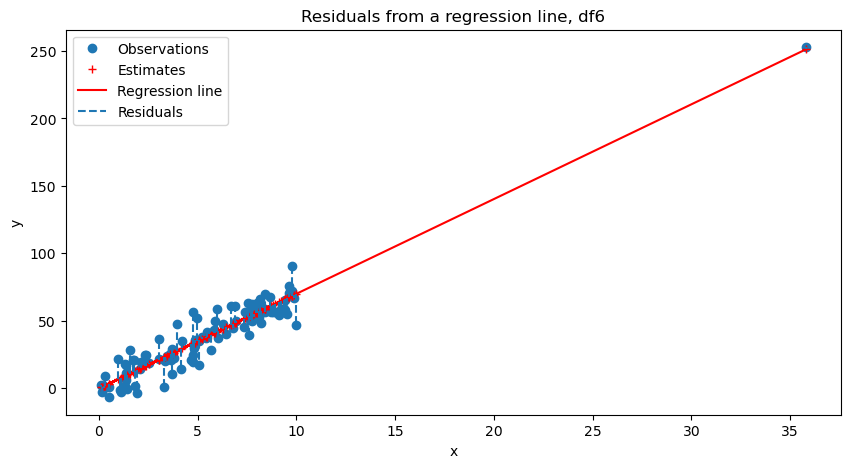

In [198]:
fig = plt.figure(figsize = (10, 5))
plt.plot(df6.x, df6.y, "o", label = "Observations")
plt.plot(df6.x, df6.y_est, "r+", label = "Estimates")
plt.plot(df6.x, df6.y_est, "r-", label = "Regression line")
plt.vlines(df6.x, df6.y_est, df6.y, linestyles = "dashed", label = "Residuals")
plt.title("Residuals from a regression line, df6")
plt.xlabel("x")
plt.ylabel("y")
plt.legend();

The regression line goes approximately through the center of the cloud of points: roughly one-half of the points lie above the regression line and another half lie below. There is one outlier far from the cloud. However, it falls quite close to the least squares line and does not appear to be very influential.

count    1.010000e+02
mean    -5.645649e-15
std      9.252081e+00
min     -2.305339e+01
25%     -5.103361e+00
50%     -3.559015e-01
75%      5.543791e+00
max      2.329843e+01
Name: y_res, dtype: float64

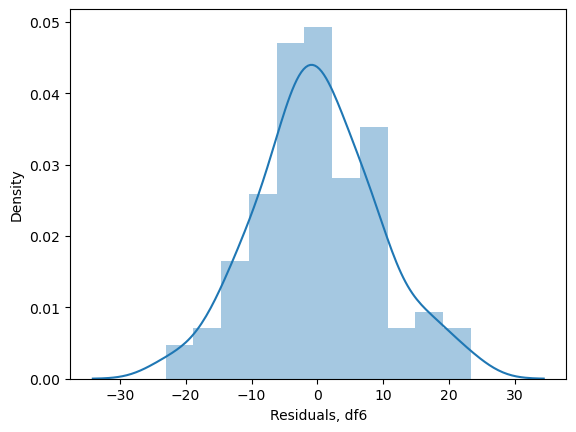

In [200]:
df6["y_res"] = df6["y"] - df6["y_est"]
sns.distplot(df6.y_res)
plt.xlabel("Residuals, df6");
df6["y_res"].describe()

The residuals are nearly normal.

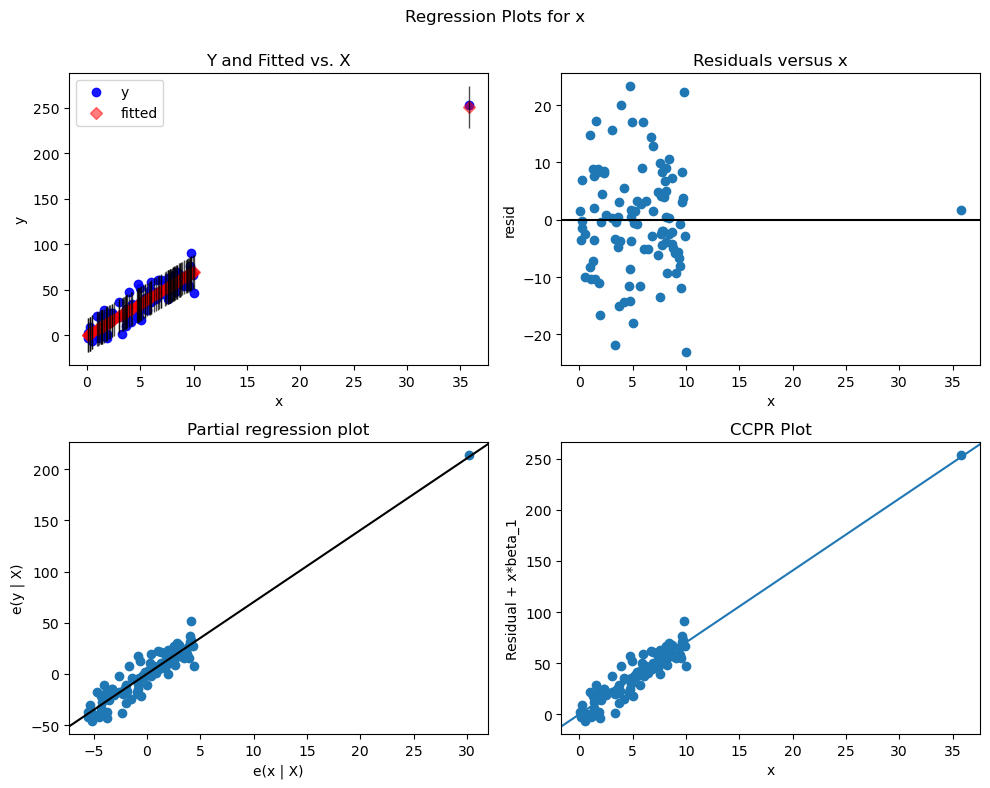

In [202]:
fig = plt.figure(figsize = (10, 8))
fig = plot_regress_exog(m_df6, "x", fig = fig)

The variability of points around the least squares line remains roughly constant.